In [1]:
import json
from pathlib import Path
from typing import List, Optional
from zipfile import ZipFile

import liblzfse
import numpy as np
import open3d as o3d
import tqdm
from PIL import Image
from quaternion import as_rotation_matrix, quaternion
from torch.utils.data import Dataset

import sys
sys.path.append('..')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Import default class labels.
from dataloaders.scannet_200_classes import CLASS_LABELS_200

# TODO: Replace with your own path.
DATA_PATH = '../data/clip_fields_add_table.r3d'

In [4]:
CUSTOM_LABELS = [
    "dining table",
    "shelf",
    "sofa",
    "low table",
    "door",
    "fan",
    "cushion",
    "chair",
    "bottle",
    "mattress",
    "plate",
    "bowl",
    "mug",
    "orange",
    "apple",
    "banana",
    "strawberry",
    "spoon",
    "knife",
    "fork",
    "window",
    "blind",
    "tv",
    "remote controller",
    "side table",
    "snack"
    "chips can",
    "cracker box",
    "chocolate",
    "cereal box",
]

In [5]:
from dataloaders import R3DSemanticDataset, DeticDenseLabelledDataset
dataset = R3DSemanticDataset(DATA_PATH, CUSTOM_LABELS)
print(dataset.__getitem__(0)['rgb'].dtype)
print(dataset.__getitem__(0)['depth'].shape)
print(dataset.__getitem__(12)['xyz_position'].shape)
print(dataset.__getitem__(0)['conf'].shape)
print(dataset.__getitem__(0)['shape'])
print(dataset.__getitem__(0)['rgbd_shape'])

720
960


Calculating global XYZs: 100%|████████████████████████████████████████████| 145/145 [00:07<00:00, 19.42it/s]

uint8
(960, 720)
(691200, 3)
(960, 720)
(691200, 3)
(960, 720, 3)


In [6]:
from torch.utils.data import Dataset, DataLoader, Subset

dataloader = DataLoader(dataset, batch_size=1, shuffle=False, pin_memory=False)

In [7]:
import tqdm
import einops


for idx, data_dict in tqdm.tqdm(enumerate(dataloader), total=len(dataset), desc="Calculating Detic features"):
    rgb = einops.rearrange(data_dict["rgb"][..., :3], "b h w c -> b c h w")
    xyz = data_dict["xyz_position"]

    print(rgb.shape)
    print(xyz.shape)

Calculating Detic features:   0%|                                                   | 0/145 [00:00<?, ?it/s]/root/anaconda3/envs/cf/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:64: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  return default_collate([torch.as_tensor(b) for b in batch])
Calculating Detic features:  30%|████████████▏                            | 43/145 [00:00<00:00, 216.25it/s]

torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 6912

Calculating Detic features:  67%|███████████████████████████▍             | 97/145 [00:00<00:00, 249.66it/s]

torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 6912

Calculating Detic features: 100%|████████████████████████████████████████| 145/145 [00:00<00:00, 241.35it/s]

torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 6912

In [9]:
from dataloaders import DeticDenseLabelledDataset
labelled_dataset = DeticDenseLabelledDataset(
    dataset, 
    use_extra_classes=False, 
    exclude_gt_images=False, 
    use_lseg=False, 
    subsample_prob=0.01, 
    visualize_results=True, 
    detic_threshold=0.4,
    visualization_path="detic_labelled_results_living_add-table",
)

INFO - 2023-06-14 05:58:26,840 - SentenceTransformer - Load pretrained SentenceTransformer: all-mpnet-base-v2
INFO - 2023-06-14 05:58:28,475 - SentenceTransformer - Use pytorch device: cuda
/root/anaconda3/envs/cf/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
INFO - 2023-06-14 05:58:35,379 - file_io - URL https://dl.fbaipublicfiles.com/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth cached in /root/.torch/iopath_cache/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth
INFO - 2023-06-14 05:58:35,380 - checkpoint - [Checkpointer] Loading from /root/.torch/iopath_cache/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth ...


Loading pretrained CLIP


Calculating Detic features:   0%|                                                   | 0/145 [00:00<?, ?it/s]

torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])


Calculating Detic features:   1%|▎                                          | 1/145 [00:00<01:14,  1.93it/s]

tensor(521169)
tensor(6383)
tensor(6383)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6383, 3])
torch.Size([6383, 3])
tensor(521169)
tensor(1720)
tensor(1720)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1720, 3])
torch.Size([1720, 3])
tensor(521169)
tensor(11112)
tensor(8542)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8542, 3])
torch.Size([8542, 3])
tensor(521169)
tensor(9061)
tensor(5716)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5716, 3])
torch.Size([5716, 3])
tensor(521169)
tensor(831)
tensor(831)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([831, 3])
torch.Size([831, 3])
tensor(521169)
tensor(9061)
tensor(5716)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   1%|▌                                          | 2/145 [00:00<01:05,  2.18it/s]

tensor(520850)
tensor(6443)
tensor(6443)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6443, 3])
torch.Size([6443, 3])
tensor(520850)
tensor(11243)
tensor(8498)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8498, 3])
torch.Size([8498, 3])
tensor(520850)
tensor(1704)
tensor(1704)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1704, 3])
torch.Size([1704, 3])
tensor(520850)
tensor(9074)
tensor(5594)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5594, 3])
torch.Size([5594, 3])
tensor(520850)
tensor(893)
tensor(893)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([893, 3])
torch.Size([893, 3])
tensor(520850)
tensor(9074)
tensor(5594)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   2%|▉                                          | 3/145 [00:01<01:01,  2.32it/s]

tensor(522369)
tensor(6460)
tensor(6460)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6460, 3])
torch.Size([6460, 3])
tensor(522369)
tensor(1709)
tensor(1709)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1709, 3])
torch.Size([1709, 3])
tensor(522369)
tensor(11330)
tensor(8489)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8489, 3])
torch.Size([8489, 3])
tensor(522369)
tensor(850)
tensor(850)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([850, 3])
torch.Size([850, 3])
tensor(522369)
tensor(9105)
tensor(5500)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5500, 3])
torch.Size([5500, 3])
tensor(522369)
tensor(29748)
tensor(21912)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:   3%|█▏                                         | 4/145 [00:02<01:21,  1.73it/s]

tensor(520651)
tensor(5037)
tensor(4445)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4445, 3])
torch.Size([4445, 3])
tensor(520651)
tensor(4246)
tensor(3698)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([3698, 3])
torch.Size([3698, 3])
tensor(520651)
tensor(15160)
tensor(15160)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([15160, 3])
torch.Size([15160, 3])
tensor(520651)
tensor(249790)
tensor(221270)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([221270, 3])
torch.Size([221253, 3])
tensor(520651)
tensor(14619)
tensor(11406)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([11406, 3])
torch.Size([11406, 3])
torch.Size([1, 3, 960, 720])
torch.Size([1, 691200, 3])


Calculating Detic features:   3%|█▍                                         | 5/145 [00:02<01:14,  1.88it/s]

tensor(518149)
tensor(6392)
tensor(6392)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6392, 3])
torch.Size([6392, 3])
tensor(518149)
tensor(1666)
tensor(1666)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1666, 3])
torch.Size([1666, 3])
tensor(518149)
tensor(867)
tensor(867)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([867, 3])
torch.Size([867, 3])
tensor(518149)
tensor(11203)
tensor(8457)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8457, 3])
torch.Size([8457, 3])
tensor(518149)
tensor(9002)
tensor(5355)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5355, 3])
torch.Size([5355, 3])
tensor(518149)
tensor(9002)
tensor(5355)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   4%|█▊                                         | 6/145 [00:03<01:09,  2.01it/s]

tensor(520039)
tensor(6357)
tensor(6357)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6357, 3])
torch.Size([6357, 3])
tensor(520039)
tensor(1700)
tensor(1700)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1700, 3])
torch.Size([1700, 3])
tensor(520039)
tensor(11224)
tensor(8662)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8662, 3])
torch.Size([8662, 3])
tensor(520039)
tensor(9169)
tensor(5657)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5657, 3])
torch.Size([5657, 3])
tensor(520039)
tensor(888)
tensor(888)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([888, 3])
torch.Size([888, 3])
tensor(520039)
tensor(29941)
tensor(22152)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:   5%|██                                         | 7/145 [00:03<01:07,  2.05it/s]

tensor(538283)
tensor(6356)
tensor(6356)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6356, 3])
torch.Size([6356, 3])
tensor(538283)
tensor(1635)
tensor(1635)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1635, 3])
torch.Size([1635, 3])
tensor(538283)
tensor(839)
tensor(839)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([839, 3])
torch.Size([839, 3])
tensor(538283)
tensor(9051)
tensor(6337)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6337, 3])
torch.Size([6337, 3])
tensor(538283)
tensor(11220)
tensor(9040)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9040, 3])
torch.Size([9040, 3])
tensor(538283)
tensor(15083)
tensor(15083)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:   6%|██▎                                        | 8/145 [00:03<01:06,  2.07it/s]

tensor(544332)
tensor(6378)
tensor(6378)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6378, 3])
torch.Size([6378, 3])
tensor(544332)
tensor(894)
tensor(894)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([894, 3])
torch.Size([894, 3])
tensor(544332)
tensor(9019)
tensor(6662)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6662, 3])
torch.Size([6662, 3])
tensor(544332)
tensor(1589)
tensor(1589)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1589, 3])
torch.Size([1589, 3])
tensor(544332)
tensor(11327)
tensor(9171)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9171, 3])
torch.Size([9171, 3])
tensor(544332)
tensor(9019)
tensor(6662)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   6%|██▋                                        | 9/145 [00:04<01:04,  2.11it/s]

tensor(517743)
tensor(6488)
tensor(6488)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6488, 3])
torch.Size([6488, 3])
tensor(517743)
tensor(11178)
tensor(9008)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9008, 3])
torch.Size([9008, 3])
tensor(517743)
tensor(1694)
tensor(1694)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1694, 3])
torch.Size([1694, 3])
tensor(517743)
tensor(952)
tensor(952)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([952, 3])
torch.Size([952, 3])
tensor(517743)
tensor(9082)
tensor(7121)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7121, 3])
torch.Size([7121, 3])
tensor(517743)
tensor(9082)
tensor(7121)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   7%|██▉                                       | 10/145 [00:04<01:03,  2.12it/s]

tensor(518904)
tensor(6481)
tensor(6481)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6481, 3])
torch.Size([6481, 3])
tensor(518904)
tensor(10967)
tensor(9144)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9144, 3])
torch.Size([9144, 3])
tensor(518904)
tensor(1672)
tensor(1672)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1672, 3])
torch.Size([1672, 3])
tensor(518904)
tensor(863)
tensor(863)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([863, 3])
torch.Size([863, 3])
tensor(518904)
tensor(9140)
tensor(6587)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6587, 3])
torch.Size([6587, 3])
tensor(518904)
tensor(9140)
tensor(6587)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:   8%|███▏                                      | 11/145 [00:05<01:01,  2.18it/s]

tensor(531328)
tensor(6427)
tensor(6427)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6427, 3])
torch.Size([6427, 3])
tensor(531328)
tensor(10945)
tensor(9134)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9134, 3])
torch.Size([9134, 3])
tensor(531328)
tensor(1737)
tensor(1737)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1737, 3])
torch.Size([1737, 3])
tensor(531328)
tensor(957)
tensor(957)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([957, 3])
torch.Size([957, 3])
tensor(531328)
tensor(9066)
tensor(6881)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6881, 3])
torch.Size([6881, 3])
tensor(531328)
tensor(14979)
tensor(14979)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:   8%|███▍                                      | 12/145 [00:05<00:58,  2.28it/s]

tensor(540342)
tensor(6433)
tensor(6433)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6433, 3])
torch.Size([6433, 3])
tensor(540342)
tensor(1743)
tensor(1743)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1743, 3])
torch.Size([1743, 3])
tensor(540342)
tensor(8975)
tensor(6855)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6855, 3])
torch.Size([6855, 3])
tensor(540342)
tensor(1017)
tensor(1017)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1017, 3])
torch.Size([1017, 3])
tensor(540342)
tensor(34986)
tensor(21777)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([21777, 3])
torch.Size([21777, 3])
tensor(540342)
tensor(10994)
tensor(9005)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:   9%|███▊                                      | 13/145 [00:06<00:59,  2.23it/s]

tensor(524602)
tensor(6394)
tensor(6394)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6394, 3])
torch.Size([6394, 3])
tensor(524602)
tensor(1723)
tensor(1723)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1723, 3])
torch.Size([1723, 3])
tensor(524602)
tensor(11126)
tensor(9180)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9180, 3])
torch.Size([9180, 3])
tensor(524602)
tensor(9003)
tensor(6485)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6485, 3])
torch.Size([6485, 3])
tensor(524602)
tensor(940)
tensor(940)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([940, 3])
torch.Size([940, 3])
tensor(524602)
tensor(9003)
tensor(6485)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:  10%|████                                      | 14/145 [00:06<00:58,  2.25it/s]

tensor(516761)
tensor(6383)
tensor(6383)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6383, 3])
torch.Size([6383, 3])
tensor(516761)
tensor(11074)
tensor(9099)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9099, 3])
torch.Size([9099, 3])
tensor(516761)
tensor(1663)
tensor(1663)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1663, 3])
torch.Size([1663, 3])
tensor(516761)
tensor(9018)
tensor(6659)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6659, 3])
torch.Size([6659, 3])
tensor(516761)
tensor(9018)
tensor(6659)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6659, 3])
torch.Size([6659, 3])
tensor(516761)
tensor(942)
tensor(942)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:  10%|████▎                                     | 15/145 [00:07<00:58,  2.21it/s]

tensor(523209)
tensor(6534)
tensor(6534)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6534, 3])
torch.Size([6534, 3])
tensor(523209)
tensor(1695)
tensor(1695)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1695, 3])
torch.Size([1695, 3])
tensor(523209)
tensor(8849)
tensor(6821)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6821, 3])
torch.Size([6821, 3])
tensor(523209)
tensor(10994)
tensor(8760)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8760, 3])
torch.Size([8760, 3])
tensor(523209)
tensor(8849)
tensor(6821)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6821, 3])
torch.Size([6821, 3])
tensor(523209)
tensor(825)
tensor(825)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:  11%|████▋                                     | 16/145 [00:07<00:56,  2.27it/s]

tensor(527742)
tensor(6497)
tensor(6497)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6497, 3])
torch.Size([6497, 3])
tensor(527742)
tensor(1665)
tensor(1665)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1665, 3])
torch.Size([1665, 3])
tensor(527742)
tensor(11033)
tensor(8914)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8914, 3])
torch.Size([8914, 3])
tensor(527742)
tensor(34354)
tensor(21934)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([21934, 3])
torch.Size([21934, 3])
tensor(527742)
tensor(8886)
tensor(6492)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6492, 3])
torch.Size([6492, 3])
tensor(527742)
tensor(847)
tensor(847)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  12%|████▉                                     | 17/145 [00:07<00:58,  2.20it/s]

tensor(528465)
tensor(6402)
tensor(6402)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6402, 3])
torch.Size([6402, 3])
tensor(528465)
tensor(1677)
tensor(1677)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1677, 3])
torch.Size([1677, 3])
tensor(528465)
tensor(11137)
tensor(8627)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8627, 3])
torch.Size([8627, 3])
tensor(528465)
tensor(8775)
tensor(6956)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6956, 3])
torch.Size([6956, 3])
tensor(528465)
tensor(33409)
tensor(22732)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([22732, 3])
torch.Size([22732, 3])
tensor(528465)
tensor(8775)
tensor(6956)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  12%|█████▏                                    | 18/145 [00:08<00:57,  2.21it/s]

tensor(522771)
tensor(6313)
tensor(6313)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6313, 3])
torch.Size([6313, 3])
tensor(522771)
tensor(1669)
tensor(1669)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1669, 3])
torch.Size([1669, 3])
tensor(522771)
tensor(11012)
tensor(8692)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8692, 3])
torch.Size([8692, 3])
tensor(522771)
tensor(8847)
tensor(6583)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6583, 3])
torch.Size([6583, 3])
tensor(522771)
tensor(33041)
tensor(20550)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([20550, 3])
torch.Size([20550, 3])
tensor(522771)
tensor(8847)
tensor(6583)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  13%|█████▌                                    | 19/145 [00:08<00:57,  2.19it/s]

tensor(520754)
tensor(6452)
tensor(6452)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6452, 3])
torch.Size([6452, 3])
tensor(520754)
tensor(10989)
tensor(8793)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8793, 3])
torch.Size([8793, 3])
tensor(520754)
tensor(1667)
tensor(1667)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1667, 3])
torch.Size([1667, 3])
tensor(520754)
tensor(8909)
tensor(6581)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6581, 3])
torch.Size([6581, 3])
tensor(520754)
tensor(8909)
tensor(6581)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6581, 3])
torch.Size([6581, 3])
tensor(520754)
tensor(4393)
tensor(4235)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size(

Calculating Detic features:  14%|█████▊                                    | 20/145 [00:09<00:57,  2.18it/s]

tensor(515287)
tensor(6495)
tensor(6495)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6495, 3])
torch.Size([6495, 3])
tensor(515287)
tensor(10804)
tensor(8819)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8819, 3])
torch.Size([8819, 3])
tensor(515287)
tensor(1699)
tensor(1699)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1699, 3])
torch.Size([1699, 3])
tensor(515287)
tensor(8801)
tensor(6176)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6176, 3])
torch.Size([6176, 3])
tensor(515287)
tensor(14613)
tensor(14613)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14613, 3])
torch.Size([14613, 3])
tensor(515287)
tensor(8801)
tensor(6176)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  14%|██████                                    | 21/145 [00:09<00:56,  2.19it/s]

tensor(506742)
tensor(6433)
tensor(6400)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6400, 3])
torch.Size([6400, 3])
tensor(506742)
tensor(10932)
tensor(8439)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8439, 3])
torch.Size([8439, 3])
tensor(506742)
tensor(1743)
tensor(1743)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1743, 3])
torch.Size([1743, 3])
tensor(506742)
tensor(895)
tensor(895)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([895, 3])
torch.Size([895, 3])
tensor(506742)
tensor(8945)
tensor(6335)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6335, 3])
torch.Size([6335, 3])
tensor(506742)
tensor(8945)
tensor(6335)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691

Calculating Detic features:  15%|██████▎                                   | 22/145 [00:10<00:56,  2.19it/s]

tensor(506758)
tensor(6508)
tensor(6378)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6378, 3])
torch.Size([6378, 3])
tensor(506758)
tensor(1737)
tensor(1737)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1737, 3])
torch.Size([1737, 3])
tensor(506758)
tensor(10967)
tensor(8776)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8776, 3])
torch.Size([8776, 3])
tensor(506758)
tensor(955)
tensor(955)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([955, 3])
torch.Size([955, 3])
tensor(506758)
tensor(8854)
tensor(5995)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5995, 3])
torch.Size([5995, 3])
tensor(506758)
tensor(14495)
tensor(14495)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:  16%|██████▋                                   | 23/145 [00:10<00:55,  2.18it/s]

tensor(498094)
tensor(6450)
tensor(6417)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6417, 3])
torch.Size([6417, 3])
tensor(498094)
tensor(1666)
tensor(1666)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1666, 3])
torch.Size([1666, 3])
tensor(498094)
tensor(10895)
tensor(8670)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8670, 3])
torch.Size([8670, 3])
tensor(498094)
tensor(8905)
tensor(4960)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4960, 3])
torch.Size([4960, 3])
tensor(498094)
tensor(8905)
tensor(4960)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4960, 3])
torch.Size([4960, 3])
tensor(498094)
tensor(14612)
tensor(14612)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  17%|██████▉                                   | 24/145 [00:11<01:06,  1.81it/s]

tensor(507410)
tensor(6501)
tensor(6414)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6414, 3])
torch.Size([6414, 3])
tensor(507410)
tensor(1753)
tensor(1753)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1753, 3])
torch.Size([1753, 3])
tensor(507410)
tensor(10776)
tensor(9051)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9051, 3])
torch.Size([9051, 3])
tensor(507410)
tensor(8913)
tensor(5475)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5475, 3])
torch.Size([5475, 3])
tensor(507410)
tensor(14420)
tensor(14420)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14420, 3])
torch.Size([14420, 3])
tensor(507410)
tensor(4297)
tensor(3711)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  17%|███████▏                                  | 25/145 [00:11<01:03,  1.90it/s]

tensor(517749)
tensor(6522)
tensor(6468)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6468, 3])
torch.Size([6468, 3])
tensor(517749)
tensor(1650)
tensor(1650)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1650, 3])
torch.Size([1650, 3])
tensor(517749)
tensor(10764)
tensor(8866)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8866, 3])
torch.Size([8866, 3])
tensor(517749)
tensor(14492)
tensor(14492)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14492, 3])
torch.Size([14492, 3])
tensor(517749)
tensor(8775)
tensor(5233)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5233, 3])
torch.Size([5233, 3])
tensor(517749)
tensor(8775)
tensor(5233)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  18%|███████▌                                  | 26/145 [00:12<01:00,  1.97it/s]

tensor(532658)
tensor(6458)
tensor(6458)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6458, 3])
torch.Size([6458, 3])
tensor(532658)
tensor(1686)
tensor(1686)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1686, 3])
torch.Size([1686, 3])
tensor(532658)
tensor(10825)
tensor(9047)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9047, 3])
torch.Size([9047, 3])
tensor(532658)
tensor(8797)
tensor(6732)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6732, 3])
torch.Size([6732, 3])
tensor(532658)
tensor(8797)
tensor(6732)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6732, 3])
torch.Size([6732, 3])
tensor(532658)
tensor(14473)
tensor(14473)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  19%|███████▊                                  | 27/145 [00:12<00:56,  2.08it/s]

tensor(540012)
tensor(6390)
tensor(6390)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6390, 3])
torch.Size([6390, 3])
tensor(540012)
tensor(10690)
tensor(8985)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8985, 3])
torch.Size([8985, 3])
tensor(540012)
tensor(1620)
tensor(1620)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1620, 3])
torch.Size([1620, 3])
tensor(540012)
tensor(8846)
tensor(6390)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6390, 3])
torch.Size([6390, 3])
tensor(540012)
tensor(8846)
tensor(6390)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6390, 3])
torch.Size([6390, 3])
tensor(540012)
tensor(29795)
tensor(21712)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  19%|████████                                  | 28/145 [00:13<00:54,  2.14it/s]

tensor(545549)
tensor(6500)
tensor(6500)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6500, 3])
torch.Size([6500, 3])
tensor(545549)
tensor(10756)
tensor(8946)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8946, 3])
torch.Size([8946, 3])
tensor(545549)
tensor(1745)
tensor(1745)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1745, 3])
torch.Size([1745, 3])
tensor(545549)
tensor(8854)
tensor(6077)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6077, 3])
torch.Size([6077, 3])
tensor(545549)
tensor(8854)
tensor(6077)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6077, 3])
torch.Size([6077, 3])
tensor(545549)
tensor(14266)
tensor(14266)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  20%|████████▍                                 | 29/145 [00:13<00:53,  2.18it/s]

tensor(538481)
tensor(6447)
tensor(6447)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6447, 3])
torch.Size([6447, 3])
tensor(538481)
tensor(10728)
tensor(8977)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8977, 3])
torch.Size([8977, 3])
tensor(538481)
tensor(1757)
tensor(1757)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1757, 3])
torch.Size([1757, 3])
tensor(538481)
tensor(8766)
tensor(6270)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6270, 3])
torch.Size([6270, 3])
tensor(538481)
tensor(8766)
tensor(6270)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6270, 3])
torch.Size([6270, 3])
tensor(538481)
tensor(14349)
tensor(14349)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  21%|████████▋                                 | 30/145 [00:14<00:51,  2.22it/s]

tensor(535266)
tensor(6516)
tensor(6516)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6516, 3])
torch.Size([6516, 3])
tensor(535266)
tensor(10566)
tensor(8877)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8877, 3])
torch.Size([8877, 3])
tensor(535266)
tensor(1703)
tensor(1703)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1703, 3])
torch.Size([1703, 3])
tensor(535266)
tensor(8588)
tensor(6679)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6679, 3])
torch.Size([6679, 3])
tensor(535266)
tensor(8588)
tensor(6679)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6679, 3])
torch.Size([6679, 3])
tensor(535266)
tensor(14369)
tensor(14369)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  21%|████████▉                                 | 31/145 [00:14<00:51,  2.21it/s]

tensor(534128)
tensor(6489)
tensor(6489)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6489, 3])
torch.Size([6489, 3])
tensor(534128)
tensor(10651)
tensor(8544)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8544, 3])
torch.Size([8544, 3])
tensor(534128)
tensor(1713)
tensor(1713)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1713, 3])
torch.Size([1713, 3])
tensor(534128)
tensor(8697)
tensor(7018)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7018, 3])
torch.Size([7018, 3])
tensor(534128)
tensor(8697)
tensor(7018)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7018, 3])
torch.Size([7018, 3])
tensor(534128)
tensor(14369)
tensor(14369)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  22%|█████████▎                                | 32/145 [00:15<00:52,  2.15it/s]

tensor(532483)
tensor(6514)
tensor(6399)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6399, 3])
torch.Size([6399, 3])
tensor(532483)
tensor(10483)
tensor(8288)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8288, 3])
torch.Size([8288, 3])
tensor(532483)
tensor(8781)
tensor(7393)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7393, 3])
torch.Size([7393, 3])
tensor(532483)
tensor(8781)
tensor(7393)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7393, 3])
torch.Size([7393, 3])
tensor(532483)
tensor(1768)
tensor(1768)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1768, 3])
torch.Size([1768, 3])
tensor(532483)
tensor(23313)
tensor(18160)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  23%|█████████▌                                | 33/145 [00:15<00:51,  2.17it/s]

tensor(530056)
tensor(6614)
tensor(6614)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6614, 3])
torch.Size([6614, 3])
tensor(530056)
tensor(10561)
tensor(7827)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7827, 3])
torch.Size([7827, 3])
tensor(530056)
tensor(8619)
tensor(6393)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6393, 3])
torch.Size([6393, 3])
tensor(530056)
tensor(1719)
tensor(1719)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1719, 3])
torch.Size([1719, 3])
tensor(530056)
tensor(8619)
tensor(6393)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6393, 3])
torch.Size([6393, 3])
tensor(530056)
tensor(13736)
tensor(8643)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  23%|█████████▊                                | 34/145 [00:16<00:51,  2.17it/s]

tensor(530039)
tensor(6508)
tensor(6508)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6508, 3])
torch.Size([6508, 3])
tensor(530039)
tensor(1763)
tensor(1763)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1763, 3])
torch.Size([1763, 3])
tensor(530039)
tensor(10404)
tensor(7971)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7971, 3])
torch.Size([7971, 3])
tensor(530039)
tensor(8651)
tensor(5967)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5967, 3])
torch.Size([5967, 3])
tensor(530039)
tensor(8651)
tensor(5967)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5967, 3])
torch.Size([5967, 3])
tensor(530039)
tensor(15314)
tensor(10222)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  24%|██████████▏                               | 35/145 [00:16<00:49,  2.21it/s]

tensor(526823)
tensor(6621)
tensor(6621)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6621, 3])
torch.Size([6621, 3])
tensor(526823)
tensor(10423)
tensor(8320)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8320, 3])
torch.Size([8320, 3])
tensor(526823)
tensor(1636)
tensor(1636)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1636, 3])
torch.Size([1636, 3])
tensor(526823)
tensor(8572)
tensor(5989)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5989, 3])
torch.Size([5989, 3])
tensor(526823)
tensor(8572)
tensor(5989)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5989, 3])
torch.Size([5989, 3])
tensor(526823)
tensor(4296)
tensor(3936)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size(

Calculating Detic features:  25%|██████████▍                               | 36/145 [00:16<00:49,  2.21it/s]

tensor(528077)
tensor(6472)
tensor(6472)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6472, 3])
torch.Size([6472, 3])
tensor(528077)
tensor(10389)
tensor(8543)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8543, 3])
torch.Size([8543, 3])
tensor(528077)
tensor(1687)
tensor(1687)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1687, 3])
torch.Size([1687, 3])
tensor(528077)
tensor(8614)
tensor(7299)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7299, 3])
torch.Size([7299, 3])
tensor(528077)
tensor(8614)
tensor(7299)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7299, 3])
torch.Size([7299, 3])
tensor(528077)
tensor(17593)
tensor(13598)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  26%|██████████▋                               | 37/145 [00:17<00:48,  2.21it/s]

tensor(532197)
tensor(6651)
tensor(6651)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6651, 3])
torch.Size([6651, 3])
tensor(532197)
tensor(10307)
tensor(8383)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8383, 3])
torch.Size([8383, 3])
tensor(532197)
tensor(1617)
tensor(1617)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1617, 3])
torch.Size([1617, 3])
tensor(532197)
tensor(8432)
tensor(6039)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6039, 3])
torch.Size([6039, 3])
tensor(532197)
tensor(8432)
tensor(6039)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6039, 3])
torch.Size([6039, 3])
tensor(532197)
tensor(18631)
tensor(15130)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  26%|███████████                               | 38/145 [00:17<00:48,  2.21it/s]

tensor(530304)
tensor(6614)
tensor(6614)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6614, 3])
torch.Size([6614, 3])
tensor(530304)
tensor(10356)
tensor(8350)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8350, 3])
torch.Size([8350, 3])
tensor(530304)
tensor(1645)
tensor(1645)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1645, 3])
torch.Size([1645, 3])
tensor(530304)
tensor(8381)
tensor(6530)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6530, 3])
torch.Size([6530, 3])
tensor(530304)
tensor(8381)
tensor(6530)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6530, 3])
torch.Size([6530, 3])
tensor(530304)
tensor(258851)
tensor(233616)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  27%|███████████▎                              | 39/145 [00:18<00:47,  2.24it/s]

tensor(545821)
tensor(6695)
tensor(6695)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6695, 3])
torch.Size([6695, 3])
tensor(545821)
tensor(10189)
tensor(8326)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8326, 3])
torch.Size([8326, 3])
tensor(545821)
tensor(8383)
tensor(6383)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6383, 3])
torch.Size([6383, 3])
tensor(545821)
tensor(1692)
tensor(1692)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1692, 3])
torch.Size([1692, 3])
tensor(545821)
tensor(8383)
tensor(6383)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6383, 3])
torch.Size([6383, 3])
tensor(545821)
tensor(258805)
tensor(235187)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  28%|███████████▌                              | 40/145 [00:18<00:47,  2.23it/s]

tensor(542921)
tensor(6605)
tensor(6605)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6605, 3])
torch.Size([6605, 3])
tensor(542921)
tensor(10172)
tensor(8181)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8181, 3])
torch.Size([8181, 3])
tensor(542921)
tensor(8254)
tensor(6655)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6655, 3])
torch.Size([6655, 3])
tensor(542921)
tensor(8254)
tensor(6655)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6655, 3])
torch.Size([6655, 3])
tensor(542921)
tensor(1742)
tensor(1742)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1742, 3])
torch.Size([1742, 3])
tensor(542921)
tensor(22884)
tensor(19765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  28%|███████████▉                              | 41/145 [00:19<00:45,  2.26it/s]

tensor(538180)
tensor(6664)
tensor(6664)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6664, 3])
torch.Size([6664, 3])
tensor(538180)
tensor(10303)
tensor(7690)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7690, 3])
torch.Size([7690, 3])
tensor(538180)
tensor(748)
tensor(748)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([748, 3])
torch.Size([748, 3])
tensor(538180)
tensor(23756)
tensor(20716)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([20716, 3])
torch.Size([20716, 3])
tensor(538180)
tensor(256476)
tensor(228954)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([228954, 3])
torch.Size([228921, 3])
tensor(538180)
tensor(13612)
tensor(13612)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
t

Calculating Detic features:  29%|████████████▏                             | 42/145 [00:19<00:44,  2.29it/s]

tensor(543386)
tensor(6674)
tensor(6674)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6674, 3])
torch.Size([6674, 3])
tensor(543386)
tensor(10225)
tensor(7889)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7889, 3])
torch.Size([7889, 3])
tensor(543386)
tensor(8361)
tensor(7262)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7262, 3])
torch.Size([7262, 3])
tensor(543386)
tensor(8361)
tensor(7262)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7262, 3])
torch.Size([7262, 3])
tensor(543386)
tensor(1723)
tensor(1723)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1723, 3])
torch.Size([1723, 3])
tensor(543386)
tensor(673)
tensor(673)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([6

Calculating Detic features:  30%|████████████▍                             | 43/145 [00:19<00:43,  2.36it/s]

tensor(542468)
tensor(6830)
tensor(6830)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6830, 3])
torch.Size([6830, 3])
tensor(542468)
tensor(10187)
tensor(8191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8191, 3])
torch.Size([8191, 3])
tensor(542468)
tensor(8536)
tensor(7018)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7018, 3])
torch.Size([7018, 3])
tensor(542468)
tensor(1735)
tensor(1735)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1735, 3])
torch.Size([1735, 3])
tensor(542468)
tensor(8536)
tensor(7018)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7018, 3])
torch.Size([7018, 3])
tensor(542468)
tensor(257844)
tensor(233940)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  30%|████████████▋                             | 44/145 [00:20<00:52,  1.91it/s]

tensor(537564)
tensor(6677)
tensor(6512)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6512, 3])
torch.Size([6512, 3])
tensor(537564)
tensor(10074)
tensor(8011)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8011, 3])
torch.Size([8011, 3])
tensor(537564)
tensor(8326)
tensor(6655)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6655, 3])
torch.Size([6655, 3])
tensor(537564)
tensor(8326)
tensor(6655)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6655, 3])
torch.Size([6655, 3])
tensor(537564)
tensor(1735)
tensor(1735)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1735, 3])
torch.Size([1735, 3])
tensor(537564)
tensor(248878)
tensor(227985)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  31%|█████████████                             | 45/145 [00:21<00:49,  2.00it/s]

tensor(557538)
tensor(6667)
tensor(6656)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6656, 3])
torch.Size([6656, 3])
tensor(557538)
tensor(10011)
tensor(8595)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8595, 3])
torch.Size([8595, 3])
tensor(557538)
tensor(1731)
tensor(1731)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1731, 3])
torch.Size([1731, 3])
tensor(557538)
tensor(8491)
tensor(6540)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6540, 3])
torch.Size([6540, 3])
tensor(557538)
tensor(8491)
tensor(6540)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6540, 3])
torch.Size([6540, 3])
tensor(557538)
tensor(13487)
tensor(13487)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  32%|█████████████▎                            | 46/145 [00:21<00:46,  2.11it/s]

tensor(548914)
tensor(6780)
tensor(6780)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6780, 3])
torch.Size([6780, 3])
tensor(548914)
tensor(10105)
tensor(8713)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8713, 3])
torch.Size([8713, 3])
tensor(548914)
tensor(8393)
tensor(6535)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6535, 3])
torch.Size([6535, 3])
tensor(548914)
tensor(8393)
tensor(6535)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6535, 3])
torch.Size([6535, 3])
tensor(548914)
tensor(13373)
tensor(13373)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13373, 3])
torch.Size([13373, 3])
tensor(548914)
tensor(1691)
tensor(1691)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  32%|█████████████▌                            | 47/145 [00:21<00:44,  2.20it/s]

tensor(541594)
tensor(6794)
tensor(6794)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6794, 3])
torch.Size([6794, 3])
tensor(541594)
tensor(10022)
tensor(8242)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8242, 3])
torch.Size([8242, 3])
tensor(541594)
tensor(8344)
tensor(5996)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5996, 3])
torch.Size([5996, 3])
tensor(541594)
tensor(8344)
tensor(5996)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5996, 3])
torch.Size([5996, 3])
tensor(541594)
tensor(1742)
tensor(1742)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1742, 3])
torch.Size([1742, 3])
tensor(541594)
tensor(13281)
tensor(13281)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  33%|█████████████▉                            | 48/145 [00:22<00:43,  2.24it/s]

tensor(534853)
tensor(6748)
tensor(6495)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6495, 3])
torch.Size([6495, 3])
tensor(534853)
tensor(9981)
tensor(8309)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8309, 3])
torch.Size([8309, 3])
tensor(534853)
tensor(8382)
tensor(6651)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6651, 3])
torch.Size([6651, 3])
tensor(534853)
tensor(8382)
tensor(6651)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6651, 3])
torch.Size([6651, 3])
tensor(534853)
tensor(13353)
tensor(13353)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13353, 3])
torch.Size([13353, 3])
tensor(534853)
tensor(1765)
tensor(1765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  34%|██████████████▏                           | 49/145 [00:22<00:43,  2.23it/s]

tensor(542681)
tensor(6840)
tensor(6746)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6746, 3])
torch.Size([6746, 3])
tensor(542681)
tensor(10017)
tensor(8104)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8104, 3])
torch.Size([8104, 3])
tensor(542681)
tensor(8448)
tensor(6411)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6411, 3])
torch.Size([6411, 3])
tensor(542681)
tensor(34040)
tensor(28573)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([28573, 3])
torch.Size([28573, 3])
tensor(542681)
tensor(8448)
tensor(6411)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6411, 3])
torch.Size([6411, 3])
tensor(542681)
tensor(4427)
tensor(1946)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  34%|██████████████▍                           | 50/145 [00:23<00:42,  2.22it/s]

tensor(554297)
tensor(6825)
tensor(6825)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6825, 3])
torch.Size([6825, 3])
tensor(554297)
tensor(9985)
tensor(8598)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8598, 3])
torch.Size([8598, 3])
tensor(554297)
tensor(8342)
tensor(6239)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6239, 3])
torch.Size([6239, 3])
tensor(554297)
tensor(34735)
tensor(29583)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29583, 3])
torch.Size([29583, 3])
tensor(554297)
tensor(13176)
tensor(13176)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13176, 3])
torch.Size([13176, 3])
tensor(554297)
tensor(8342)
tensor(6239)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  35%|██████████████▊                           | 51/145 [00:23<00:41,  2.25it/s]

tensor(542794)
tensor(6783)
tensor(6691)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6691, 3])
torch.Size([6691, 3])
tensor(542794)
tensor(9936)
tensor(8661)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8661, 3])
torch.Size([8658, 3])
tensor(542794)
tensor(8217)
tensor(6565)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6565, 3])
torch.Size([6565, 3])
tensor(542794)
tensor(34490)
tensor(29334)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29334, 3])
torch.Size([29334, 3])
tensor(542794)
tensor(8217)
tensor(6565)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6565, 3])
torch.Size([6565, 3])
tensor(542794)
tensor(13306)
tensor(13306)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  36%|███████████████                           | 52/145 [00:24<00:42,  2.20it/s]

tensor(542959)
tensor(6738)
tensor(6575)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6575, 3])
torch.Size([6575, 3])
tensor(542959)
tensor(9961)
tensor(8503)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8503, 3])
torch.Size([8503, 3])
tensor(542959)
tensor(8340)
tensor(7070)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7070, 3])
torch.Size([7070, 3])
tensor(542959)
tensor(8340)
tensor(7070)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7070, 3])
torch.Size([7070, 3])
tensor(542959)
tensor(1882)
tensor(1882)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1882, 3])
torch.Size([1882, 3])
tensor(542959)
tensor(36055)
tensor(30428)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  37%|███████████████▎                          | 53/145 [00:24<00:44,  2.09it/s]

tensor(551012)
tensor(6722)
tensor(6722)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6722, 3])
torch.Size([6722, 3])
tensor(551012)
tensor(9960)
tensor(8614)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8614, 3])
torch.Size([8614, 3])
tensor(551012)
tensor(1764)
tensor(1764)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1764, 3])
torch.Size([1764, 3])
tensor(551012)
tensor(36686)
tensor(31627)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([31627, 3])
torch.Size([31627, 3])
tensor(551012)
tensor(8223)
tensor(6836)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6836, 3])
torch.Size([6836, 3])
tensor(551012)
tensor(13223)
tensor(13223)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  37%|███████████████▋                          | 54/145 [00:25<00:41,  2.18it/s]

tensor(545427)
tensor(6720)
tensor(6720)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6720, 3])
torch.Size([6720, 3])
tensor(545427)
tensor(9956)
tensor(8306)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8306, 3])
torch.Size([8306, 3])
tensor(545427)
tensor(8203)
tensor(5952)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5952, 3])
torch.Size([5952, 3])
tensor(545427)
tensor(8203)
tensor(5952)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5952, 3])
torch.Size([5952, 3])
tensor(545427)
tensor(37237)
tensor(31608)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([31608, 3])
torch.Size([31608, 3])
tensor(545427)
tensor(13371)
tensor(13371)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  38%|███████████████▉                          | 55/145 [00:25<00:40,  2.22it/s]

tensor(544171)
tensor(6817)
tensor(6817)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6817, 3])
torch.Size([6817, 3])
tensor(544171)
tensor(9931)
tensor(8435)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8435, 3])
torch.Size([8435, 3])
tensor(544171)
tensor(1746)
tensor(1746)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1746, 3])
torch.Size([1746, 3])
tensor(544171)
tensor(38158)
tensor(32594)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([32594, 3])
torch.Size([32594, 3])
tensor(544171)
tensor(13368)
tensor(13368)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13368, 3])
torch.Size([13368, 3])
tensor(544171)
tensor(8104)
tensor(5666)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  39%|████████████████▏                         | 56/145 [00:26<00:39,  2.23it/s]

tensor(541173)
tensor(6863)
tensor(6863)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6863, 3])
torch.Size([6863, 3])
tensor(541173)
tensor(9819)
tensor(7875)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7875, 3])
torch.Size([7875, 3])
tensor(541173)
tensor(8197)
tensor(5953)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5953, 3])
torch.Size([5953, 3])
tensor(541173)
tensor(39915)
tensor(34459)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34459, 3])
torch.Size([34459, 3])
tensor(541173)
tensor(8197)
tensor(5953)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5953, 3])
torch.Size([5953, 3])
tensor(541173)
tensor(1859)
tensor(1859)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  39%|████████████████▌                         | 57/145 [00:26<00:39,  2.25it/s]

tensor(542619)
tensor(6817)
tensor(6817)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6817, 3])
torch.Size([6817, 3])
tensor(542619)
tensor(9822)
tensor(8076)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8076, 3])
torch.Size([8076, 3])
tensor(542619)
tensor(8229)
tensor(5798)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5798, 3])
torch.Size([5798, 3])
tensor(542619)
tensor(38780)
tensor(33167)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33167, 3])
torch.Size([33167, 3])
tensor(542619)
tensor(8229)
tensor(5798)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5798, 3])
torch.Size([5798, 3])
tensor(542619)
tensor(1883)
tensor(1883)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  40%|████████████████▊                         | 58/145 [00:26<00:37,  2.32it/s]

tensor(539092)
tensor(6862)
tensor(6862)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6862, 3])
torch.Size([6862, 3])
tensor(539092)
tensor(9826)
tensor(7915)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7915, 3])
torch.Size([7915, 3])
tensor(539092)
tensor(38711)
tensor(33285)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33285, 3])
torch.Size([33285, 3])
tensor(539092)
tensor(8157)
tensor(5744)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5744, 3])
torch.Size([5744, 3])
tensor(539092)
tensor(13175)
tensor(13175)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13175, 3])
torch.Size([13175, 3])
tensor(539092)
tensor(1910)
tensor(1910)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  41%|█████████████████                         | 59/145 [00:27<00:36,  2.33it/s]

tensor(539667)
tensor(6869)
tensor(6869)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6869, 3])
torch.Size([6869, 3])
tensor(539667)
tensor(9750)
tensor(7916)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7916, 3])
torch.Size([7913, 3])
tensor(539667)
tensor(8091)
tensor(6215)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6215, 3])
torch.Size([6215, 3])
tensor(539667)
tensor(38765)
tensor(33654)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33654, 3])
torch.Size([33653, 3])
tensor(539667)
tensor(1799)
tensor(1799)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1799, 3])
torch.Size([1799, 3])
tensor(539667)
tensor(13205)
tensor(13205)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  41%|█████████████████▍                        | 60/145 [00:27<00:36,  2.30it/s]

tensor(531821)
tensor(6770)
tensor(6769)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6769, 3])
torch.Size([6769, 3])
tensor(531821)
tensor(9705)
tensor(7705)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7705, 3])
torch.Size([7705, 3])
tensor(531821)
tensor(8104)
tensor(5005)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5005, 3])
torch.Size([5005, 3])
tensor(531821)
tensor(39214)
tensor(33204)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33204, 3])
torch.Size([33204, 3])
tensor(531821)
tensor(8104)
tensor(5005)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5005, 3])
torch.Size([5005, 3])
tensor(531821)
tensor(13108)
tensor(13108)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  42%|█████████████████▋                        | 61/145 [00:28<00:36,  2.29it/s]

tensor(529474)
tensor(6822)
tensor(6822)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6822, 3])
torch.Size([6822, 3])
tensor(529474)
tensor(9672)
tensor(7168)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7168, 3])
torch.Size([7168, 3])
tensor(529474)
tensor(40280)
tensor(33273)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33273, 3])
torch.Size([33273, 3])
tensor(529474)
tensor(8175)
tensor(5386)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5386, 3])
torch.Size([5386, 3])
tensor(529474)
tensor(13074)
tensor(13074)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13074, 3])
torch.Size([13074, 3])
tensor(529474)
tensor(8175)
tensor(5386)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  43%|█████████████████▉                        | 62/145 [00:28<00:36,  2.26it/s]

tensor(527200)
tensor(6719)
tensor(6712)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6712, 3])
torch.Size([6712, 3])
tensor(527200)
tensor(40207)
tensor(33429)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33429, 3])
torch.Size([33423, 3])
tensor(527200)
tensor(9611)
tensor(7556)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7556, 3])
torch.Size([7556, 3])
tensor(527200)
tensor(8125)
tensor(5309)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5309, 3])
torch.Size([5309, 3])
tensor(527200)
tensor(8125)
tensor(5309)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5309, 3])
torch.Size([5309, 3])
tensor(527200)
tensor(255451)
tensor(225289)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  43%|██████████████████▏                       | 63/145 [00:29<00:35,  2.29it/s]

tensor(531592)
tensor(6770)
tensor(6770)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6770, 3])
torch.Size([6770, 3])
tensor(531592)
tensor(40074)
tensor(33734)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33734, 3])
torch.Size([33733, 3])
tensor(531592)
tensor(1956)
tensor(1956)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1956, 3])
torch.Size([1956, 3])
tensor(531592)
tensor(9649)
tensor(7692)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7692, 3])
torch.Size([7688, 3])
tensor(531592)
tensor(8079)
tensor(6341)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6341, 3])
torch.Size([6341, 3])
tensor(531592)
tensor(8079)
tensor(6341)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  44%|██████████████████▌                       | 64/145 [00:29<00:35,  2.31it/s]

tensor(525408)
tensor(6762)
tensor(6759)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6759, 3])
torch.Size([6759, 3])
tensor(525408)
tensor(40562)
tensor(33547)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33547, 3])
torch.Size([33506, 3])
tensor(525408)
tensor(9642)
tensor(7701)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7701, 3])
torch.Size([7701, 3])
tensor(525408)
tensor(1787)
tensor(1787)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1787, 3])
torch.Size([1787, 3])
tensor(525408)
tensor(7924)
tensor(4975)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4975, 3])
torch.Size([4975, 3])
tensor(525408)
tensor(13111)
tensor(13111)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  45%|██████████████████▊                       | 65/145 [00:30<00:42,  1.89it/s]

tensor(545244)
tensor(6778)
tensor(6767)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6767, 3])
torch.Size([6767, 3])
tensor(545244)
tensor(9698)
tensor(7684)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7684, 3])
torch.Size([7684, 3])
tensor(545244)
tensor(40528)
tensor(33675)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33675, 3])
torch.Size([33673, 3])
tensor(545244)
tensor(1880)
tensor(1880)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1880, 3])
torch.Size([1880, 3])
tensor(545244)
tensor(12865)
tensor(12865)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([12865, 3])
torch.Size([12865, 3])
tensor(545244)
tensor(4362)
tensor(1806)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  46%|███████████████████                       | 66/145 [00:30<00:41,  1.88it/s]

tensor(534920)
tensor(6762)
tensor(6755)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6755, 3])
torch.Size([6755, 3])
tensor(534920)
tensor(9560)
tensor(7713)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7713, 3])
torch.Size([7713, 3])
tensor(534920)
tensor(40796)
tensor(33787)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33787, 3])
torch.Size([33787, 3])
tensor(534920)
tensor(1873)
tensor(1873)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1873, 3])
torch.Size([1873, 3])
tensor(534920)
tensor(13023)
tensor(13023)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13023, 3])
torch.Size([13023, 3])
tensor(534920)
tensor(7953)
tensor(5036)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  46%|███████████████████▍                      | 67/145 [00:31<00:41,  1.88it/s]

tensor(537704)
tensor(6830)
tensor(6830)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6830, 3])
torch.Size([6830, 3])
tensor(537704)
tensor(9582)
tensor(7501)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7501, 3])
torch.Size([7501, 3])
tensor(537704)
tensor(40650)
tensor(33842)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33842, 3])
torch.Size([33840, 3])
tensor(537704)
tensor(1942)
tensor(1942)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1942, 3])
torch.Size([1942, 3])
tensor(537704)
tensor(765)
tensor(765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([765, 3])
torch.Size([765, 3])
tensor(537704)
tensor(12962)
tensor(12962)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  47%|███████████████████▋                      | 68/145 [00:31<00:39,  1.97it/s]

tensor(543763)
tensor(6705)
tensor(6705)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6705, 3])
torch.Size([6705, 3])
tensor(543763)
tensor(9472)
tensor(7043)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7043, 3])
torch.Size([7043, 3])
tensor(543763)
tensor(41021)
tensor(34220)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34220, 3])
torch.Size([34203, 3])
tensor(543763)
tensor(1928)
tensor(1928)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1928, 3])
torch.Size([1928, 3])
tensor(543763)
tensor(8041)
tensor(5152)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5152, 3])
torch.Size([5152, 3])
tensor(543763)
tensor(4350)
tensor(2356)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  48%|███████████████████▉                      | 69/145 [00:32<00:37,  2.04it/s]

tensor(535587)
tensor(6757)
tensor(6755)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6755, 3])
torch.Size([6755, 3])
tensor(535587)
tensor(9501)
tensor(7169)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7169, 3])
torch.Size([7169, 3])
tensor(535587)
tensor(40933)
tensor(34279)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34279, 3])
torch.Size([34279, 3])
tensor(535587)
tensor(1985)
tensor(1985)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1985, 3])
torch.Size([1985, 3])
tensor(535587)
tensor(260188)
tensor(229085)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([229085, 3])
torch.Size([229042, 3])
tensor(535587)
tensor(13071)
tensor(13071)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200]

Calculating Detic features:  48%|████████████████████▎                     | 70/145 [00:32<00:34,  2.15it/s]

tensor(531742)
tensor(6754)
tensor(6754)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6754, 3])
torch.Size([6754, 3])
tensor(531742)
tensor(9483)
tensor(7250)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7250, 3])
torch.Size([7250, 3])
tensor(531742)
tensor(41243)
tensor(34153)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34153, 3])
torch.Size([34147, 3])
tensor(531742)
tensor(1946)
tensor(1946)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1946, 3])
torch.Size([1946, 3])
tensor(531742)
tensor(13041)
tensor(13041)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13041, 3])
torch.Size([13041, 3])
tensor(531742)
tensor(253731)
tensor(225670)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])


Calculating Detic features:  49%|████████████████████▌                     | 71/145 [00:33<00:33,  2.22it/s]

tensor(536924)
tensor(6767)
tensor(6762)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6762, 3])
torch.Size([6762, 3])
tensor(536924)
tensor(41189)
tensor(34409)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34409, 3])
torch.Size([34409, 3])
tensor(536924)
tensor(1922)
tensor(1922)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1922, 3])
torch.Size([1922, 3])
tensor(536924)
tensor(9448)
tensor(7568)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7568, 3])
torch.Size([7568, 3])
tensor(536924)
tensor(13145)
tensor(13145)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13145, 3])
torch.Size([13145, 3])
tensor(536924)
tensor(4340)
tensor(1898)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  50%|████████████████████▊                     | 72/145 [00:33<00:32,  2.21it/s]

tensor(537666)
tensor(6797)
tensor(6797)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6797, 3])
torch.Size([6797, 3])
tensor(537666)
tensor(41438)
tensor(33872)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33872, 3])
torch.Size([33869, 3])
tensor(537666)
tensor(1825)
tensor(1825)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1825, 3])
torch.Size([1825, 3])
tensor(537666)
tensor(9457)
tensor(8083)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8083, 3])
torch.Size([8083, 3])
tensor(537666)
tensor(13085)
tensor(13085)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13085, 3])
torch.Size([13085, 3])
tensor(537666)
tensor(750)
tensor(750)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  50%|█████████████████████▏                    | 73/145 [00:33<00:32,  2.22it/s]

tensor(544166)
tensor(6829)
tensor(6829)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6829, 3])
torch.Size([6829, 3])
tensor(544166)
tensor(42024)
tensor(34560)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34560, 3])
torch.Size([34558, 3])
tensor(544166)
tensor(9570)
tensor(7762)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7762, 3])
torch.Size([7762, 3])
tensor(544166)
tensor(1879)
tensor(1879)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1879, 3])
torch.Size([1879, 3])
tensor(544166)
tensor(13146)
tensor(13146)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13146, 3])
torch.Size([13146, 3])
tensor(544166)
tensor(8133)
tensor(4840)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  51%|█████████████████████▍                    | 74/145 [00:34<00:31,  2.27it/s]

tensor(539866)
tensor(6893)
tensor(6893)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6893, 3])
torch.Size([6893, 3])
tensor(539866)
tensor(9634)
tensor(7699)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7699, 3])
torch.Size([7699, 3])
tensor(539866)
tensor(42086)
tensor(34501)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34501, 3])
torch.Size([34495, 3])
tensor(539866)
tensor(1858)
tensor(1858)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1858, 3])
torch.Size([1858, 3])
tensor(539866)
tensor(13100)
tensor(13100)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13100, 3])
torch.Size([13100, 3])
tensor(539866)
tensor(248440)
tensor(225480)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])


Calculating Detic features:  52%|█████████████████████▋                    | 75/145 [00:34<00:31,  2.22it/s]

tensor(542825)
tensor(6894)
tensor(6894)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6894, 3])
torch.Size([6894, 3])
tensor(542825)
tensor(9589)
tensor(7786)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7786, 3])
torch.Size([7783, 3])
tensor(542825)
tensor(42228)
tensor(34523)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34523, 3])
torch.Size([34521, 3])
tensor(542825)
tensor(1877)
tensor(1877)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1877, 3])
torch.Size([1877, 3])
tensor(542825)
tensor(13145)
tensor(13145)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13145, 3])
torch.Size([13145, 3])
tensor(542825)
tensor(8030)
tensor(5342)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  52%|██████████████████████                    | 76/145 [00:35<00:31,  2.22it/s]

tensor(542124)
tensor(6821)
tensor(6821)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6821, 3])
torch.Size([6821, 3])
tensor(542124)
tensor(9555)
tensor(7562)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7562, 3])
torch.Size([7561, 3])
tensor(542124)
tensor(42379)
tensor(35937)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35937, 3])
torch.Size([35935, 3])
tensor(542124)
tensor(7954)
tensor(4806)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4806, 3])
torch.Size([4806, 3])
tensor(542124)
tensor(1872)
tensor(1872)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1872, 3])
torch.Size([1872, 3])
tensor(542124)
tensor(13126)
tensor(13126)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  53%|██████████████████████▎                   | 77/145 [00:35<00:30,  2.25it/s]

tensor(540860)
tensor(6767)
tensor(6767)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6767, 3])
torch.Size([6767, 3])
tensor(540860)
tensor(9530)
tensor(7412)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7412, 3])
torch.Size([7408, 3])
tensor(540860)
tensor(42518)
tensor(35593)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35593, 3])
torch.Size([35593, 3])
tensor(540860)
tensor(1848)
tensor(1848)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1848, 3])
torch.Size([1848, 3])
tensor(540860)
tensor(7841)
tensor(4731)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4731, 3])
torch.Size([4731, 3])
tensor(540860)
tensor(7841)
tensor(4731)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  54%|██████████████████████▌                   | 78/145 [00:36<00:30,  2.21it/s]

tensor(535989)
tensor(6783)
tensor(6783)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6783, 3])
torch.Size([6783, 3])
tensor(535989)
tensor(9594)
tensor(7548)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7548, 3])
torch.Size([7543, 3])
tensor(535989)
tensor(42212)
tensor(35644)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35644, 3])
torch.Size([35639, 3])
tensor(535989)
tensor(7927)
tensor(4897)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([4897, 3])
torch.Size([4897, 3])
tensor(535989)
tensor(1826)
tensor(1826)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1826, 3])
torch.Size([1826, 3])
tensor(535989)
tensor(13139)
tensor(13139)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  54%|██████████████████████▉                   | 79/145 [00:36<00:30,  2.18it/s]

tensor(537449)
tensor(6821)
tensor(6821)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6821, 3])
torch.Size([6821, 3])
tensor(537449)
tensor(42292)
tensor(35467)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35467, 3])
torch.Size([35461, 3])
tensor(537449)
tensor(9594)
tensor(7690)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7690, 3])
torch.Size([7685, 3])
tensor(537449)
tensor(1886)
tensor(1886)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1886, 3])
torch.Size([1886, 3])
tensor(537449)
tensor(7790)
tensor(5054)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5054, 3])
torch.Size([5054, 3])
tensor(537449)
tensor(13191)
tensor(13191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  55%|███████████████████████▏                  | 80/145 [00:37<00:29,  2.24it/s]

tensor(540841)
tensor(6893)
tensor(6893)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6893, 3])
torch.Size([6893, 3])
tensor(540841)
tensor(42499)
tensor(35560)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35560, 3])
torch.Size([35559, 3])
tensor(540841)
tensor(9526)
tensor(7725)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7725, 3])
torch.Size([7725, 3])
tensor(540841)
tensor(1849)
tensor(1849)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1849, 3])
torch.Size([1849, 3])
tensor(540841)
tensor(13077)
tensor(13077)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13077, 3])
torch.Size([13077, 3])
tensor(540841)
tensor(7945)
tensor(5883)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  56%|███████████████████████▍                  | 81/145 [00:37<00:29,  2.17it/s]

tensor(539414)
tensor(6792)
tensor(6792)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6792, 3])
torch.Size([6792, 3])
tensor(539414)
tensor(9461)
tensor(7703)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7703, 3])
torch.Size([7703, 3])
tensor(539414)
tensor(42421)
tensor(35510)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35510, 3])
torch.Size([35506, 3])
tensor(539414)
tensor(13119)
tensor(13119)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13119, 3])
torch.Size([13119, 3])
tensor(539414)
tensor(8040)
tensor(6107)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6107, 3])
torch.Size([6107, 3])
tensor(539414)
tensor(246794)
tensor(224352)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])


Calculating Detic features:  57%|███████████████████████▊                  | 82/145 [00:37<00:28,  2.21it/s]

tensor(536513)
tensor(6776)
tensor(6776)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6776, 3])
torch.Size([6776, 3])
tensor(536513)
tensor(9430)
tensor(7709)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7709, 3])
torch.Size([7709, 3])
tensor(536513)
tensor(42231)
tensor(35418)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35418, 3])
torch.Size([35406, 3])
tensor(536513)
tensor(13188)
tensor(13188)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13188, 3])
torch.Size([13188, 3])
tensor(536513)
tensor(8034)
tensor(6230)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6230, 3])
torch.Size([6230, 3])
tensor(536513)
tensor(1854)
tensor(1854)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  57%|████████████████████████                  | 83/145 [00:38<00:27,  2.27it/s]

tensor(544384)
tensor(6833)
tensor(6833)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6833, 3])
torch.Size([6833, 3])
tensor(544384)
tensor(9499)
tensor(7852)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7852, 3])
torch.Size([7852, 3])
tensor(544384)
tensor(42341)
tensor(35544)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35544, 3])
torch.Size([35538, 3])
tensor(544384)
tensor(13057)
tensor(13057)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13057, 3])
torch.Size([13057, 3])
tensor(544384)
tensor(1836)
tensor(1836)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1836, 3])
torch.Size([1836, 3])
tensor(544384)
tensor(7981)
tensor(6500)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  58%|████████████████████████▎                 | 84/145 [00:38<00:26,  2.26it/s]

tensor(545714)
tensor(6854)
tensor(6854)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6854, 3])
torch.Size([6854, 3])
tensor(545714)
tensor(42549)
tensor(35220)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35220, 3])
torch.Size([35211, 3])
tensor(545714)
tensor(9452)
tensor(7846)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7846, 3])
torch.Size([7846, 3])
tensor(545714)
tensor(1857)
tensor(1857)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1857, 3])
torch.Size([1857, 3])
tensor(545714)
tensor(13082)
tensor(13082)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13082, 3])
torch.Size([13082, 3])
tensor(545714)
tensor(8005)
tensor(6070)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  59%|████████████████████████▌                 | 85/145 [00:39<00:26,  2.28it/s]

tensor(555012)
tensor(6915)
tensor(6915)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6915, 3])
torch.Size([6915, 3])
tensor(555012)
tensor(9488)
tensor(7638)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7638, 3])
torch.Size([7638, 3])
tensor(555012)
tensor(42877)
tensor(35550)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35550, 3])
torch.Size([35546, 3])
tensor(555012)
tensor(7982)
tensor(5832)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5832, 3])
torch.Size([5832, 3])
tensor(555012)
tensor(13065)
tensor(13065)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13065, 3])
torch.Size([13065, 3])
tensor(555012)
tensor(7982)
tensor(5832)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  59%|████████████████████████▉                 | 86/145 [00:40<00:30,  1.90it/s]

tensor(559808)
tensor(6853)
tensor(6853)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6853, 3])
torch.Size([6853, 3])
tensor(559808)
tensor(9512)
tensor(7961)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7961, 3])
torch.Size([7961, 3])
tensor(559808)
tensor(42674)
tensor(35908)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35908, 3])
torch.Size([35902, 3])
tensor(559808)
tensor(7920)
tensor(5615)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5615, 3])
torch.Size([5615, 3])
tensor(559808)
tensor(1805)
tensor(1805)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1805, 3])
torch.Size([1805, 3])
tensor(559808)
tensor(7920)
tensor(5615)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  60%|█████████████████████████▏                | 87/145 [00:40<00:29,  1.96it/s]

tensor(567129)
tensor(6836)
tensor(6836)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6836, 3])
torch.Size([6836, 3])
tensor(567129)
tensor(9419)
tensor(7837)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7837, 3])
torch.Size([7837, 3])
tensor(567129)
tensor(42949)
tensor(35395)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35395, 3])
torch.Size([35385, 3])
tensor(567129)
tensor(1828)
tensor(1828)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1828, 3])
torch.Size([1828, 3])
tensor(567129)
tensor(8012)
tensor(6151)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6151, 3])
torch.Size([6151, 3])
tensor(567129)
tensor(8012)
tensor(6151)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  61%|█████████████████████████▍                | 88/145 [00:40<00:29,  1.96it/s]

tensor(564502)
tensor(6856)
tensor(6856)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6856, 3])
torch.Size([6856, 3])
tensor(564502)
tensor(9488)
tensor(7848)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7848, 3])
torch.Size([7848, 3])
tensor(564502)
tensor(1844)
tensor(1844)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1844, 3])
torch.Size([1844, 3])
tensor(564502)
tensor(43207)
tensor(36229)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([36229, 3])
torch.Size([36228, 3])
tensor(564502)
tensor(7999)
tensor(5732)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5732, 3])
torch.Size([5732, 3])
tensor(564502)
tensor(13008)
tensor(13008)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  61%|█████████████████████████▊                | 89/145 [00:41<00:27,  2.03it/s]

tensor(544795)
tensor(6879)
tensor(6879)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6879, 3])
torch.Size([6879, 3])
tensor(544795)
tensor(9485)
tensor(7697)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7697, 3])
torch.Size([7697, 3])
tensor(544795)
tensor(1931)
tensor(1931)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1931, 3])
torch.Size([1931, 3])
tensor(544795)
tensor(42994)
tensor(35696)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35696, 3])
torch.Size([35694, 3])
tensor(544795)
tensor(4393)
tensor(1765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1765, 3])
torch.Size([1765, 3])
tensor(544795)
tensor(7987)
tensor(5922)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  62%|██████████████████████████                | 90/145 [00:41<00:26,  2.08it/s]

tensor(541849)
tensor(6846)
tensor(6846)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6846, 3])
torch.Size([6846, 3])
tensor(541849)
tensor(9497)
tensor(7635)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7635, 3])
torch.Size([7635, 3])
tensor(541849)
tensor(43301)
tensor(35711)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35711, 3])
torch.Size([35659, 3])
tensor(541849)
tensor(1813)
tensor(1813)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1813, 3])
torch.Size([1813, 3])
tensor(541849)
tensor(7865)
tensor(5807)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5807, 3])
torch.Size([5807, 3])
tensor(541849)
tensor(4441)
tensor(1906)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  63%|██████████████████████████▎               | 91/145 [00:42<00:25,  2.15it/s]

tensor(543782)
tensor(6865)
tensor(6865)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6865, 3])
torch.Size([6865, 3])
tensor(543782)
tensor(9562)
tensor(8082)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8082, 3])
torch.Size([8082, 3])
tensor(543782)
tensor(43140)
tensor(34789)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34789, 3])
torch.Size([34739, 3])
tensor(543782)
tensor(1831)
tensor(1831)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1831, 3])
torch.Size([1831, 3])
tensor(543782)
tensor(7837)
tensor(5635)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5635, 3])
torch.Size([5635, 3])
tensor(543782)
tensor(245052)
tensor(224760)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  63%|██████████████████████████▋               | 92/145 [00:42<00:24,  2.18it/s]

tensor(543706)
tensor(6833)
tensor(6833)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6833, 3])
torch.Size([6833, 3])
tensor(543706)
tensor(42988)
tensor(34400)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34400, 3])
torch.Size([34339, 3])
tensor(543706)
tensor(9518)
tensor(8022)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8022, 3])
torch.Size([8022, 3])
tensor(543706)
tensor(1861)
tensor(1861)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1861, 3])
torch.Size([1861, 3])
tensor(543706)
tensor(7882)
tensor(6191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6191, 3])
torch.Size([6191, 3])
tensor(543706)
tensor(7882)
tensor(6191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  64%|██████████████████████████▉               | 93/145 [00:43<00:23,  2.23it/s]

tensor(540162)
tensor(6815)
tensor(6686)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6686, 3])
torch.Size([6686, 3])
tensor(540162)
tensor(9565)
tensor(7825)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7825, 3])
torch.Size([7817, 3])
tensor(540162)
tensor(42411)
tensor(33672)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33672, 3])
torch.Size([33656, 3])
tensor(540162)
tensor(7846)
tensor(6794)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6794, 3])
torch.Size([6794, 3])
tensor(540162)
tensor(1854)
tensor(1854)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1854, 3])
torch.Size([1854, 3])
tensor(540162)
tensor(13029)
tensor(13029)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  65%|███████████████████████████▏              | 94/145 [00:43<00:23,  2.20it/s]

tensor(541624)
tensor(6743)
tensor(6731)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6731, 3])
torch.Size([6731, 3])
tensor(541624)
tensor(9581)
tensor(7840)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7840, 3])
torch.Size([7840, 3])
tensor(541624)
tensor(42641)
tensor(33818)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33818, 3])
torch.Size([33815, 3])
tensor(541624)
tensor(8015)
tensor(6445)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6445, 3])
torch.Size([6445, 3])
tensor(541624)
tensor(1824)
tensor(1824)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1824, 3])
torch.Size([1824, 3])
tensor(541624)
tensor(8015)
tensor(6445)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  66%|███████████████████████████▌              | 95/145 [00:44<00:22,  2.19it/s]

tensor(538524)
tensor(6765)
tensor(6765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6765, 3])
torch.Size([6765, 3])
tensor(538524)
tensor(42628)
tensor(35131)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35131, 3])
torch.Size([35130, 3])
tensor(538524)
tensor(9584)
tensor(7792)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7792, 3])
torch.Size([7792, 3])
tensor(538524)
tensor(1753)
tensor(1753)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1753, 3])
torch.Size([1753, 3])
tensor(538524)
tensor(7966)
tensor(5960)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5960, 3])
torch.Size([5960, 3])
tensor(538524)
tensor(7966)
tensor(5960)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  66%|███████████████████████████▊              | 96/145 [00:44<00:22,  2.22it/s]

tensor(538744)
tensor(6857)
tensor(6857)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6857, 3])
torch.Size([6857, 3])
tensor(538744)
tensor(41864)
tensor(34663)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34663, 3])
torch.Size([34663, 3])
tensor(538744)
tensor(9591)
tensor(7969)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7969, 3])
torch.Size([7969, 3])
tensor(538744)
tensor(8004)
tensor(5854)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5854, 3])
torch.Size([5854, 3])
tensor(538744)
tensor(13130)
tensor(13130)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13130, 3])
torch.Size([13130, 3])
tensor(538744)
tensor(1815)
tensor(1815)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  67%|████████████████████████████              | 97/145 [00:45<00:22,  2.18it/s]

tensor(533342)
tensor(6794)
tensor(6752)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6752, 3])
torch.Size([6752, 3])
tensor(533342)
tensor(42417)
tensor(35228)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35228, 3])
torch.Size([35228, 3])
tensor(533342)
tensor(7932)
tensor(5882)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5882, 3])
torch.Size([5882, 3])
tensor(533342)
tensor(9617)
tensor(7805)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7805, 3])
torch.Size([7805, 3])
tensor(533342)
tensor(7932)
tensor(5882)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5882, 3])
torch.Size([5882, 3])
tensor(533342)
tensor(13040)
tensor(13040)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  68%|████████████████████████████▍             | 98/145 [00:45<00:21,  2.16it/s]

tensor(538487)
tensor(6723)
tensor(6535)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6535, 3])
torch.Size([6535, 3])
tensor(538487)
tensor(41702)
tensor(35494)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35494, 3])
torch.Size([35494, 3])
tensor(538487)
tensor(9847)
tensor(7718)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7718, 3])
torch.Size([7718, 3])
tensor(538487)
tensor(8122)
tensor(5621)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5621, 3])
torch.Size([5621, 3])
tensor(538487)
tensor(13023)
tensor(13023)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13023, 3])
torch.Size([13023, 3])
tensor(538487)
tensor(8122)
tensor(5621)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  68%|████████████████████████████▋             | 99/145 [00:45<00:20,  2.22it/s]

tensor(536600)
tensor(6774)
tensor(6774)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6774, 3])
torch.Size([6774, 3])
tensor(536600)
tensor(9855)
tensor(8023)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8023, 3])
torch.Size([8023, 3])
tensor(536600)
tensor(41095)
tensor(34724)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34724, 3])
torch.Size([34724, 3])
tensor(536600)
tensor(1819)
tensor(1819)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1819, 3])
torch.Size([1819, 3])
tensor(536600)
tensor(13099)
tensor(13099)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13099, 3])
torch.Size([13099, 3])
tensor(536600)
tensor(8092)
tensor(6694)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  69%|████████████████████████████▎            | 100/145 [00:46<00:19,  2.31it/s]

tensor(547892)
tensor(6834)
tensor(6834)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6834, 3])
torch.Size([6834, 3])
tensor(547892)
tensor(10071)
tensor(7704)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7704, 3])
torch.Size([7704, 3])
tensor(547892)
tensor(40867)
tensor(34268)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34268, 3])
torch.Size([34268, 3])
tensor(547892)
tensor(13093)
tensor(13093)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13093, 3])
torch.Size([13093, 3])
tensor(547892)
tensor(1734)
tensor(1734)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1734, 3])
torch.Size([1734, 3])
tensor(547892)
tensor(252281)
tensor(226965)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  70%|████████████████████████████▌            | 101/145 [00:46<00:19,  2.25it/s]

tensor(569549)
tensor(6665)
tensor(6665)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6665, 3])
torch.Size([6665, 3])
tensor(569549)
tensor(10138)
tensor(8305)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8305, 3])
torch.Size([8291, 3])
tensor(569549)
tensor(13336)
tensor(13336)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13336, 3])
torch.Size([13336, 3])
tensor(569549)
tensor(42617)
tensor(37513)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([37513, 3])
torch.Size([37512, 3])
tensor(569549)
tensor(8031)
tensor(6515)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6515, 3])
torch.Size([6515, 3])
tensor(569549)
tensor(254032)
tensor(232670)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  70%|████████████████████████████▊            | 102/145 [00:47<00:18,  2.27it/s]

tensor(585020)
tensor(6832)
tensor(6604)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6604, 3])
torch.Size([6604, 3])
tensor(585020)
tensor(10261)
tensor(8658)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8658, 3])
torch.Size([8658, 3])
tensor(585020)
tensor(8220)
tensor(6143)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6143, 3])
torch.Size([6143, 3])
tensor(585020)
tensor(38868)
tensor(33939)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33939, 3])
torch.Size([33939, 3])
tensor(585020)
tensor(8220)
tensor(6143)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6143, 3])
torch.Size([6143, 3])
tensor(585020)
tensor(13272)
tensor(13272)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch

Calculating Detic features:  71%|█████████████████████████████            | 103/145 [00:47<00:18,  2.32it/s]

tensor(593391)
tensor(6631)
tensor(6624)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6624, 3])
torch.Size([6624, 3])
tensor(593391)
tensor(10210)
tensor(8687)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8687, 3])
torch.Size([8687, 3])
tensor(593391)
tensor(8358)
tensor(6592)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6592, 3])
torch.Size([6592, 3])
tensor(593391)
tensor(43209)
tensor(38306)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([38306, 3])
torch.Size([38306, 3])
tensor(593391)
tensor(13340)
tensor(13340)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13340, 3])
torch.Size([13340, 3])
tensor(593391)
tensor(258799)
tensor(231865)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  72%|█████████████████████████████▋           | 105/145 [00:48<00:13,  3.06it/s]

tensor(556349)
tensor(6717)
tensor(6707)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6707, 3])
torch.Size([6707, 3])
tensor(556349)
tensor(10355)
tensor(8805)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8805, 3])
torch.Size([8805, 3])
tensor(556349)
tensor(8523)
tensor(7054)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7054, 3])
torch.Size([7054, 3])
tensor(556349)
tensor(8523)
tensor(7054)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7054, 3])
torch.Size([7054, 3])
tensor(556349)
tensor(13362)
tensor(13362)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13362, 3])
torch.Size([13362, 3])
tensor(556349)
tensor(263144)
tensor(237598)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
tor

Calculating Detic features:  73%|█████████████████████████████▉           | 106/145 [00:48<00:14,  2.71it/s]

tensor(555932)
tensor(6856)
tensor(6774)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6774, 3])
torch.Size([6774, 3])
tensor(555932)
tensor(10465)
tensor(9094)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9094, 3])
torch.Size([9094, 3])
tensor(555932)
tensor(8496)
tensor(6814)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6814, 3])
torch.Size([6814, 3])
tensor(555932)
tensor(13662)
tensor(13662)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13662, 3])
torch.Size([13662, 3])
tensor(555932)
tensor(8496)
tensor(6814)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6814, 3])
torch.Size([6814, 3])
tensor(555932)
tensor(265606)
tensor(239649)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
tor

Calculating Detic features:  74%|██████████████████████████████▎          | 107/145 [00:48<00:14,  2.59it/s]

tensor(559915)
tensor(6899)
tensor(6860)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6860, 3])
torch.Size([6860, 3])
tensor(559915)
tensor(1812)
tensor(1812)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1812, 3])
torch.Size([1812, 3])
tensor(559915)
tensor(8561)
tensor(7147)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7147, 3])
torch.Size([7147, 3])
tensor(559915)
tensor(10870)
tensor(9441)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9441, 3])
torch.Size([9435, 3])
tensor(559915)
tensor(8561)
tensor(7147)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7147, 3])
torch.Size([7147, 3])
tensor(559915)
tensor(13679)
tensor(13679)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Siz

Calculating Detic features:  74%|██████████████████████████████▌          | 108/145 [00:49<00:14,  2.50it/s]

tensor(558089)
tensor(6923)
tensor(6883)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6883, 3])
torch.Size([6883, 3])
tensor(558089)
tensor(1779)
tensor(1779)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1779, 3])
torch.Size([1779, 3])
tensor(558089)
tensor(10571)
tensor(9485)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9485, 3])
torch.Size([9485, 3])
tensor(558089)
tensor(8360)
tensor(6735)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6735, 3])
torch.Size([6735, 3])
tensor(558089)
tensor(13785)
tensor(13785)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13785, 3])
torch.Size([13785, 3])
tensor(558089)
tensor(8360)
tensor(6735)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.S

Calculating Detic features:  75%|██████████████████████████████▊          | 109/145 [00:50<00:18,  1.92it/s]

tensor(560814)
tensor(6920)
tensor(6903)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6903, 3])
torch.Size([6903, 3])
tensor(560814)
tensor(1823)
tensor(1823)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1823, 3])
torch.Size([1823, 3])
tensor(560814)
tensor(10571)
tensor(9541)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9541, 3])
torch.Size([9541, 3])
tensor(560814)
tensor(8438)
tensor(6730)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6730, 3])
torch.Size([6730, 3])
tensor(560814)
tensor(13919)
tensor(13919)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13919, 3])
torch.Size([13919, 3])
tensor(560814)
tensor(40002)
tensor(34848)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch

Calculating Detic features:  76%|███████████████████████████████          | 110/145 [00:50<00:17,  2.00it/s]

tensor(576956)
tensor(6963)
tensor(6910)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6910, 3])
torch.Size([6910, 3])
tensor(576956)
tensor(10592)
tensor(9533)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9533, 3])
torch.Size([9533, 3])
tensor(576956)
tensor(8571)
tensor(7058)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7058, 3])
torch.Size([7058, 3])
tensor(576956)
tensor(13867)
tensor(13867)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([13867, 3])
torch.Size([13867, 3])
tensor(576956)
tensor(8571)
tensor(7058)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7058, 3])
torch.Size([7058, 3])
tensor(576956)
tensor(38587)
tensor(34114)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch

Calculating Detic features:  77%|███████████████████████████████▍         | 111/145 [00:51<00:16,  2.12it/s]

tensor(573900)
tensor(6896)
tensor(6896)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6896, 3])
torch.Size([6896, 3])
tensor(573900)
tensor(10521)
tensor(9251)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9251, 3])
torch.Size([9251, 3])
tensor(573900)
tensor(8348)
tensor(6547)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6547, 3])
torch.Size([6547, 3])
tensor(573900)
tensor(36791)
tensor(32170)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([32170, 3])
torch.Size([32170, 3])
tensor(573900)
tensor(8348)
tensor(6547)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6547, 3])
torch.Size([6547, 3])
tensor(573900)
tensor(13850)
tensor(13850)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch

Calculating Detic features:  77%|███████████████████████████████▋         | 112/145 [00:51<00:14,  2.25it/s]

tensor(569673)
tensor(10564)
tensor(9170)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([9170, 3])
torch.Size([9170, 3])
tensor(569673)
tensor(37098)
tensor(32482)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([32482, 3])
torch.Size([32482, 3])
tensor(569673)
tensor(6851)
tensor(6851)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6851, 3])
torch.Size([6851, 3])
tensor(569673)
tensor(272303)
tensor(245013)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([245013, 3])
torch.Size([245009, 3])
tensor(569673)
tensor(4336)
tensor(3158)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([3158, 3])
torch.Size([3158, 3])
tensor(569673)
tensor(13903)
tensor(13903)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200

Calculating Detic features:  78%|███████████████████████████████▉         | 113/145 [00:51<00:13,  2.37it/s]

tensor(583292)
tensor(6932)
tensor(6932)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6932, 3])
torch.Size([6932, 3])
tensor(583292)
tensor(10527)
tensor(8467)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8467, 3])
torch.Size([8466, 3])
tensor(583292)
tensor(37181)
tensor(32799)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([32799, 3])
torch.Size([32799, 3])
tensor(583292)
tensor(4308)
tensor(3722)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([3722, 3])
torch.Size([3722, 3])
tensor(583292)
tensor(273160)
tensor(247979)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([247979, 3])
torch.Size([247975, 3])
tensor(583292)
tensor(13903)
tensor(13903)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200

Calculating Detic features:  79%|████████████████████████████████▏        | 114/145 [00:52<00:12,  2.46it/s]

tensor(562007)
tensor(10461)
tensor(7935)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7935, 3])
torch.Size([7935, 3])
tensor(562007)
tensor(36944)
tensor(32845)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([32845, 3])
torch.Size([32845, 3])
tensor(562007)
tensor(4190)
tensor(3259)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([3259, 3])
torch.Size([3259, 3])
tensor(562007)
tensor(267534)
tensor(245123)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([245123, 3])
torch.Size([245123, 3])
tensor(562007)
tensor(8084)
tensor(6974)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6974, 3])
torch.Size([6974, 3])
tensor(562007)
tensor(8084)
tensor(6974)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  79%|████████████████████████████████▌        | 115/145 [00:52<00:11,  2.50it/s]

tensor(525977)
tensor(10347)
tensor(7592)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7592, 3])
torch.Size([7592, 3])
tensor(525977)
tensor(36420)
tensor(31724)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([31724, 3])
torch.Size([31724, 3])
tensor(525977)
tensor(4218)
tensor(1983)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1983, 3])
torch.Size([1983, 3])
tensor(525977)
tensor(264444)
tensor(235129)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([235129, 3])
torch.Size([235128, 3])
tensor(525977)
tensor(7944)
tensor(6251)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6251, 3])
torch.Size([6251, 3])
tensor(525977)
tensor(7944)
tensor(6251)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  80%|████████████████████████████████▊        | 116/145 [00:52<00:11,  2.52it/s]

tensor(532703)
tensor(10577)
tensor(8022)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8022, 3])
torch.Size([8020, 3])
tensor(532703)
tensor(6762)
tensor(6762)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6762, 3])
torch.Size([6762, 3])
tensor(532703)
tensor(35092)
tensor(31048)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([31048, 3])
torch.Size([31048, 3])
tensor(532703)
tensor(266326)
tensor(241389)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([241389, 3])
torch.Size([241389, 3])
tensor(532703)
tensor(4063)
tensor(1878)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1878, 3])
torch.Size([1878, 3])
tensor(532703)
tensor(14043)
tensor(14043)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200

Calculating Detic features:  81%|█████████████████████████████████        | 117/145 [00:53<00:11,  2.53it/s]

tensor(535043)
tensor(10179)
tensor(8183)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8183, 3])
torch.Size([8183, 3])
tensor(535043)
tensor(34402)
tensor(29891)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29891, 3])
torch.Size([29891, 3])
tensor(535043)
tensor(6695)
tensor(6665)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6665, 3])
torch.Size([6665, 3])
tensor(535043)
tensor(266406)
tensor(238356)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([238356, 3])
torch.Size([238356, 3])
tensor(535043)
tensor(4091)
tensor(2458)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2458, 3])
torch.Size([2458, 3])
tensor(535043)
tensor(14187)
tensor(14187)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200

Calculating Detic features:  81%|█████████████████████████████████▎       | 118/145 [00:53<00:10,  2.51it/s]

tensor(518445)
tensor(10083)
tensor(7185)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7185, 3])
torch.Size([7183, 3])
tensor(518445)
tensor(34214)
tensor(28827)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([28827, 3])
torch.Size([28827, 3])
tensor(518445)
tensor(4068)
tensor(1417)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1417, 3])
torch.Size([1417, 3])
tensor(518445)
tensor(6835)
tensor(6412)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6412, 3])
torch.Size([6412, 3])
tensor(518445)
tensor(14096)
tensor(14096)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14096, 3])
torch.Size([14096, 3])
tensor(518445)
tensor(269067)
tensor(233677)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])

Calculating Detic features:  82%|█████████████████████████████████▋       | 119/145 [00:54<00:10,  2.49it/s]

tensor(513635)
tensor(33453)
tensor(28857)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([28857, 3])
torch.Size([28857, 3])
tensor(513635)
tensor(10134)
tensor(7670)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7670, 3])
torch.Size([7670, 3])
tensor(513635)
tensor(4042)
tensor(1743)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1743, 3])
torch.Size([1743, 3])
tensor(513635)
tensor(267797)
tensor(235568)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([235568, 3])
torch.Size([235502, 3])
tensor(513635)
tensor(14376)
tensor(14376)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14376, 3])
torch.Size([14376, 3])
tensor(513635)
tensor(8010)
tensor(5635)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([6912

Calculating Detic features:  83%|█████████████████████████████████▉       | 120/145 [00:54<00:10,  2.49it/s]

tensor(526424)
tensor(6820)
tensor(6820)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6820, 3])
torch.Size([6820, 3])
tensor(526424)
tensor(33688)
tensor(29029)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29029, 3])
torch.Size([29029, 3])
tensor(526424)
tensor(10107)
tensor(7805)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7805, 3])
torch.Size([7805, 3])
tensor(526424)
tensor(267418)
tensor(238871)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([238871, 3])
torch.Size([238865, 3])
tensor(526424)
tensor(4228)
tensor(2293)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2293, 3])
torch.Size([2293, 3])
tensor(526424)
tensor(14491)
tensor(14491)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200

Calculating Detic features:  83%|██████████████████████████████████▏      | 121/145 [00:55<00:09,  2.41it/s]

tensor(550197)
tensor(6947)
tensor(6947)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6947, 3])
torch.Size([6947, 3])
tensor(550197)
tensor(9937)
tensor(8314)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8314, 3])
torch.Size([8314, 3])
tensor(550197)
tensor(33647)
tensor(29042)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29042, 3])
torch.Size([29037, 3])
tensor(550197)
tensor(266051)
tensor(240825)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([240825, 3])
torch.Size([240807, 3])
tensor(550197)
tensor(14697)
tensor(14697)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14697, 3])
torch.Size([14697, 3])
tensor(550197)
tensor(4336)
tensor(2003)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([69120

Calculating Detic features:  84%|██████████████████████████████████▍      | 122/145 [00:55<00:09,  2.34it/s]

tensor(525299)
tensor(6933)
tensor(6933)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6933, 3])
torch.Size([6933, 3])
tensor(525299)
tensor(34332)
tensor(29880)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([29880, 3])
torch.Size([29880, 3])
tensor(525299)
tensor(9876)
tensor(8610)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8610, 3])
torch.Size([8609, 3])
tensor(525299)
tensor(14510)
tensor(14510)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14510, 3])
torch.Size([14510, 3])
tensor(525299)
tensor(263951)
tensor(237053)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([237053, 3])
torch.Size([236864, 3])
tensor(525299)
tensor(7789)
tensor(5959)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([69120

Calculating Detic features:  85%|██████████████████████████████████▊      | 123/145 [00:55<00:09,  2.31it/s]

tensor(517331)
tensor(6800)
tensor(6768)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6768, 3])
torch.Size([6768, 3])
tensor(517331)
tensor(9790)
tensor(8279)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8279, 3])
torch.Size([8277, 3])
tensor(517331)
tensor(14404)
tensor(14404)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14404, 3])
torch.Size([14404, 3])
tensor(517331)
tensor(35420)
tensor(30848)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([30848, 3])
torch.Size([30848, 3])
tensor(517331)
tensor(3997)
tensor(1817)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1817, 3])
torch.Size([1817, 3])
tensor(517331)
tensor(7737)
tensor(5990)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  86%|███████████████████████████████████      | 124/145 [00:56<00:08,  2.36it/s]

tensor(527497)
tensor(9803)
tensor(8284)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8284, 3])
torch.Size([8284, 3])
tensor(527497)
tensor(4393)
tensor(2191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2191, 3])
torch.Size([2191, 3])
tensor(527497)
tensor(35449)
tensor(30939)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([30939, 3])
torch.Size([30939, 3])
tensor(527497)
tensor(14821)
tensor(14821)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14821, 3])
torch.Size([14821, 3])
tensor(527497)
tensor(7692)
tensor(6064)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6064, 3])
torch.Size([6064, 3])
tensor(527497)
tensor(7692)
tensor(6064)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  86%|███████████████████████████████████▎     | 125/145 [00:56<00:08,  2.37it/s]

tensor(536568)
tensor(6997)
tensor(6997)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6997, 3])
torch.Size([6997, 3])
tensor(536568)
tensor(1969)
tensor(1969)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1969, 3])
torch.Size([1969, 3])
tensor(536568)
tensor(9690)
tensor(8244)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8244, 3])
torch.Size([8244, 3])
tensor(536568)
tensor(7657)
tensor(5893)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5893, 3])
torch.Size([5893, 3])
tensor(536568)
tensor(7657)
tensor(5893)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5893, 3])
torch.Size([5893, 3])
tensor(536568)
tensor(37420)
tensor(32500)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  87%|███████████████████████████████████▋     | 126/145 [00:57<00:07,  2.41it/s]

tensor(538794)
tensor(6916)
tensor(6916)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6916, 3])
torch.Size([6916, 3])
tensor(538794)
tensor(9815)
tensor(8419)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8419, 3])
torch.Size([8419, 3])
tensor(538794)
tensor(38411)
tensor(33964)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33964, 3])
torch.Size([33927, 3])
tensor(538794)
tensor(7634)
tensor(6099)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6099, 3])
torch.Size([6099, 3])
tensor(538794)
tensor(4369)
tensor(2102)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2102, 3])
torch.Size([2102, 3])
tensor(538794)
tensor(14740)
tensor(14740)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  88%|███████████████████████████████████▉     | 127/145 [00:57<00:07,  2.39it/s]

tensor(568619)
tensor(6980)
tensor(6980)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6980, 3])
torch.Size([6980, 3])
tensor(568619)
tensor(9689)
tensor(8005)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8005, 3])
torch.Size([8005, 3])
tensor(568619)
tensor(4397)
tensor(2066)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2066, 3])
torch.Size([2066, 3])
tensor(568619)
tensor(7607)
tensor(6240)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6240, 3])
torch.Size([6240, 3])
tensor(568619)
tensor(7607)
tensor(6240)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6240, 3])
torch.Size([6240, 3])
tensor(568619)
tensor(38380)
tensor(33671)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  88%|████████████████████████████████████▏    | 128/145 [00:58<00:07,  2.30it/s]

tensor(560329)
tensor(7101)
tensor(7053)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7053, 3])
torch.Size([7053, 3])
tensor(560329)
tensor(9604)
tensor(7778)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7778, 3])
torch.Size([7778, 3])
tensor(560329)
tensor(38616)
tensor(34245)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34245, 3])
torch.Size([34235, 3])
tensor(560329)
tensor(14810)
tensor(14810)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14810, 3])
torch.Size([14810, 3])
tensor(560329)
tensor(7600)
tensor(5878)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5878, 3])
torch.Size([5878, 3])
tensor(560329)
tensor(7600)
tensor(5878)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  89%|████████████████████████████████████▍    | 129/145 [00:58<00:06,  2.36it/s]

tensor(558621)
tensor(6966)
tensor(6966)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6966, 3])
torch.Size([6966, 3])
tensor(558621)
tensor(7522)
tensor(5795)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5795, 3])
torch.Size([5795, 3])
tensor(558621)
tensor(9542)
tensor(8242)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8242, 3])
torch.Size([8240, 3])
tensor(558621)
tensor(7522)
tensor(5795)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5795, 3])
torch.Size([5795, 3])
tensor(558621)
tensor(14540)
tensor(14540)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14540, 3])
torch.Size([14540, 3])
tensor(558621)
tensor(39455)
tensor(34679)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  90%|████████████████████████████████████▊    | 130/145 [00:58<00:06,  2.35it/s]

tensor(540870)
tensor(7002)
tensor(7002)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7002, 3])
torch.Size([7002, 3])
tensor(540870)
tensor(9515)
tensor(7835)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7835, 3])
torch.Size([7835, 3])
tensor(540870)
tensor(7392)
tensor(5734)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5734, 3])
torch.Size([5734, 3])
tensor(540870)
tensor(39369)
tensor(34378)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34378, 3])
torch.Size([34368, 3])
tensor(540870)
tensor(7392)
tensor(5734)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5734, 3])
torch.Size([5734, 3])
tensor(540870)
tensor(14990)
tensor(14990)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  90%|█████████████████████████████████████    | 131/145 [00:59<00:05,  2.40it/s]

tensor(552935)
tensor(6927)
tensor(6927)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6927, 3])
torch.Size([6927, 3])
tensor(552935)
tensor(9486)
tensor(7878)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7878, 3])
torch.Size([7878, 3])
tensor(552935)
tensor(38796)
tensor(33673)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33673, 3])
torch.Size([33670, 3])
tensor(552935)
tensor(7495)
tensor(6435)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6435, 3])
torch.Size([6435, 3])
tensor(552935)
tensor(14765)
tensor(14765)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14765, 3])
torch.Size([14765, 3])
tensor(552935)
tensor(1873)
tensor(1873)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  91%|█████████████████████████████████████▎   | 132/145 [00:59<00:05,  2.38it/s]

tensor(553264)
tensor(7070)
tensor(7070)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7070, 3])
torch.Size([7070, 3])
tensor(553264)
tensor(9473)
tensor(7412)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7412, 3])
torch.Size([7411, 3])
tensor(553264)
tensor(14596)
tensor(14596)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14596, 3])
torch.Size([14596, 3])
tensor(553264)
tensor(39545)
tensor(34456)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34456, 3])
torch.Size([34456, 3])
tensor(553264)
tensor(1804)
tensor(1804)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1804, 3])
torch.Size([1804, 3])
tensor(553264)
tensor(7464)
tensor(6171)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  92%|█████████████████████████████████████▌   | 133/145 [01:00<00:05,  2.31it/s]

tensor(531756)
tensor(7058)
tensor(7058)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7058, 3])
torch.Size([7058, 3])
tensor(531756)
tensor(9372)
tensor(7755)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7755, 3])
torch.Size([7755, 3])
tensor(531756)
tensor(7412)
tensor(5762)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5762, 3])
torch.Size([5762, 3])
tensor(531756)
tensor(2071)
tensor(2071)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2071, 3])
torch.Size([2071, 3])
tensor(531756)
tensor(7412)
tensor(5762)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5762, 3])
torch.Size([5762, 3])
tensor(531756)
tensor(39525)
tensor(34518)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  92%|█████████████████████████████████████▉   | 134/145 [01:01<00:06,  1.65it/s]

tensor(526367)
tensor(7053)
tensor(7053)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7053, 3])
torch.Size([7053, 3])
tensor(526367)
tensor(9345)
tensor(7608)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7608, 3])
torch.Size([7608, 3])
tensor(526367)
tensor(2001)
tensor(2001)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2001, 3])
torch.Size([2001, 3])
tensor(526367)
tensor(40037)
tensor(34601)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34601, 3])
torch.Size([34601, 3])
tensor(526367)
tensor(7515)
tensor(6328)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6328, 3])
torch.Size([6328, 3])
tensor(526367)
tensor(7515)
tensor(6328)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  93%|██████████████████████████████████████▏  | 135/145 [01:01<00:05,  1.81it/s]

tensor(527646)
tensor(9341)
tensor(7457)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7457, 3])
torch.Size([7457, 3])
tensor(527646)
tensor(7043)
tensor(7043)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7043, 3])
torch.Size([7043, 3])
tensor(527646)
tensor(7497)
tensor(6444)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6444, 3])
torch.Size([6444, 3])
tensor(527646)
tensor(40056)
tensor(34647)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34647, 3])
torch.Size([34647, 3])
tensor(527646)
tensor(2042)
tensor(2042)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2042, 3])
torch.Size([2042, 3])
tensor(527646)
tensor(7497)
tensor(6444)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  94%|██████████████████████████████████████▍  | 136/145 [01:02<00:04,  1.92it/s]

tensor(526122)
tensor(9381)
tensor(7690)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7690, 3])
torch.Size([7690, 3])
tensor(526122)
tensor(7037)
tensor(7037)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7037, 3])
torch.Size([7037, 3])
tensor(526122)
tensor(2001)
tensor(2001)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2001, 3])
torch.Size([2001, 3])
tensor(526122)
tensor(7498)
tensor(6444)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6444, 3])
torch.Size([6444, 3])
tensor(526122)
tensor(7498)
tensor(6444)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6444, 3])
torch.Size([6444, 3])
tensor(526122)
tensor(39076)
tensor(33962)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size

Calculating Detic features:  94%|██████████████████████████████████████▋  | 137/145 [01:02<00:03,  2.03it/s]

tensor(527713)
tensor(9418)
tensor(7431)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7431, 3])
torch.Size([7431, 3])
tensor(527713)
tensor(7039)
tensor(7039)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7039, 3])
torch.Size([7039, 3])
tensor(527713)
tensor(39066)
tensor(33675)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33675, 3])
torch.Size([33675, 3])
tensor(527713)
tensor(7493)
tensor(6191)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6191, 3])
torch.Size([6191, 3])
tensor(527713)
tensor(2011)
tensor(2011)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2011, 3])
torch.Size([2011, 3])
tensor(527713)
tensor(14689)
tensor(14689)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  95%|███████████████████████████████████████  | 138/145 [01:02<00:03,  2.11it/s]

tensor(527259)
tensor(9459)
tensor(7713)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7713, 3])
torch.Size([7713, 3])
tensor(527259)
tensor(7022)
tensor(6969)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6969, 3])
torch.Size([6969, 3])
tensor(527259)
tensor(40252)
tensor(33523)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33523, 3])
torch.Size([33522, 3])
tensor(527259)
tensor(7359)
tensor(6382)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6382, 3])
torch.Size([6382, 3])
tensor(527259)
tensor(7359)
tensor(6382)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6382, 3])
torch.Size([6382, 3])
tensor(527259)
tensor(14663)
tensor(14663)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.

Calculating Detic features:  96%|███████████████████████████████████████▎ | 139/145 [01:03<00:02,  2.20it/s]

tensor(527911)
tensor(9557)
tensor(7400)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7400, 3])
torch.Size([7400, 3])
tensor(527911)
tensor(7032)
tensor(7012)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7012, 3])
torch.Size([7012, 3])
tensor(527911)
tensor(2009)
tensor(2009)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2009, 3])
torch.Size([2009, 3])
tensor(527911)
tensor(7407)
tensor(6479)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6479, 3])
torch.Size([6479, 3])
tensor(527911)
tensor(40635)
tensor(33751)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33751, 3])
torch.Size([33751, 3])
tensor(527911)
tensor(7407)
tensor(6479)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  97%|███████████████████████████████████████▌ | 140/145 [01:03<00:02,  2.17it/s]

tensor(528780)
tensor(9566)
tensor(7523)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7523, 3])
torch.Size([7523, 3])
tensor(528780)
tensor(1956)
tensor(1956)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1956, 3])
torch.Size([1956, 3])
tensor(528780)
tensor(41344)
tensor(33263)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([33263, 3])
torch.Size([33263, 3])
tensor(528780)
tensor(7352)
tensor(5801)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5801, 3])
torch.Size([5801, 3])
tensor(528780)
tensor(14752)
tensor(14752)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14752, 3])
torch.Size([14752, 3])
tensor(528780)
tensor(7352)
tensor(5801)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Calculating Detic features:  97%|███████████████████████████████████████▊ | 141/145 [01:04<00:01,  2.24it/s]

tensor(532701)
tensor(7027)
tensor(6903)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6903, 3])
torch.Size([6903, 3])
tensor(532701)
tensor(9580)
tensor(7520)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7520, 3])
torch.Size([7520, 3])
tensor(532701)
tensor(41434)
tensor(34662)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34662, 3])
torch.Size([34661, 3])
tensor(532701)
tensor(1904)
tensor(1904)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1904, 3])
torch.Size([1904, 3])
tensor(532701)
tensor(7422)
tensor(5681)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5681, 3])
torch.Size([5681, 3])
tensor(532701)
tensor(7422)
tensor(5681)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  98%|████████████████████████████████████████▏| 142/145 [01:04<00:01,  2.26it/s]

tensor(540537)
tensor(7027)
tensor(7027)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7027, 3])
torch.Size([7027, 3])
tensor(540537)
tensor(9509)
tensor(7911)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7911, 3])
torch.Size([7911, 3])
tensor(540537)
tensor(42528)
tensor(34133)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34133, 3])
torch.Size([34120, 3])
tensor(540537)
tensor(1894)
tensor(1894)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1894, 3])
torch.Size([1894, 3])
tensor(540537)
tensor(7544)
tensor(5654)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5654, 3])
torch.Size([5654, 3])
tensor(540537)
tensor(7544)
tensor(5654)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  99%|████████████████████████████████████████▍| 143/145 [01:05<00:00,  2.31it/s]

tensor(537965)
tensor(7028)
tensor(7022)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7022, 3])
torch.Size([7022, 3])
tensor(537965)
tensor(9554)
tensor(7839)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7839, 3])
torch.Size([7839, 3])
tensor(537965)
tensor(42525)
tensor(34403)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34403, 3])
torch.Size([34403, 3])
tensor(537965)
tensor(4428)
tensor(1325)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1325, 3])
torch.Size([1325, 3])
tensor(537965)
tensor(7552)
tensor(5116)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5116, 3])
torch.Size([5116, 3])
tensor(537965)
tensor(1963)
tensor(1963)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features:  99%|████████████████████████████████████████▋| 144/145 [01:05<00:00,  2.34it/s]

tensor(528077)
tensor(7037)
tensor(7037)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([7037, 3])
torch.Size([7037, 3])
tensor(528077)
tensor(9553)
tensor(8026)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8026, 3])
torch.Size([8025, 3])
tensor(528077)
tensor(42541)
tensor(35050)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([35050, 3])
torch.Size([35050, 3])
tensor(528077)
tensor(4526)
tensor(1486)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([1486, 3])
torch.Size([1486, 3])
tensor(528077)
tensor(7474)
tensor(5525)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([5525, 3])
torch.Size([5525, 3])
tensor(528077)
tensor(7474)
tensor(5525)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Si

Calculating Detic features: 100%|█████████████████████████████████████████| 145/145 [01:05<00:00,  2.20it/s]

tensor(541944)
tensor(7006)
tensor(6969)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([6969, 3])
torch.Size([6969, 3])
tensor(541944)
tensor(9414)
tensor(8051)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([8051, 3])
torch.Size([8051, 3])
tensor(541944)
tensor(42325)
tensor(34143)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([34143, 3])
torch.Size([34124, 3])
tensor(541944)
tensor(4510)
tensor(2275)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([2275, 3])
torch.Size([2275, 3])
tensor(541944)
tensor(14675)
tensor(14675)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torch.Size([691200, 3])
torch.Size([14675, 3])
torch.Size([14675, 3])
tensor(541944)
tensor(1754)
tensor(1754)
torch.Size([960, 720])
torch.Size([960, 720])
torch.Size([691200])
torc

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

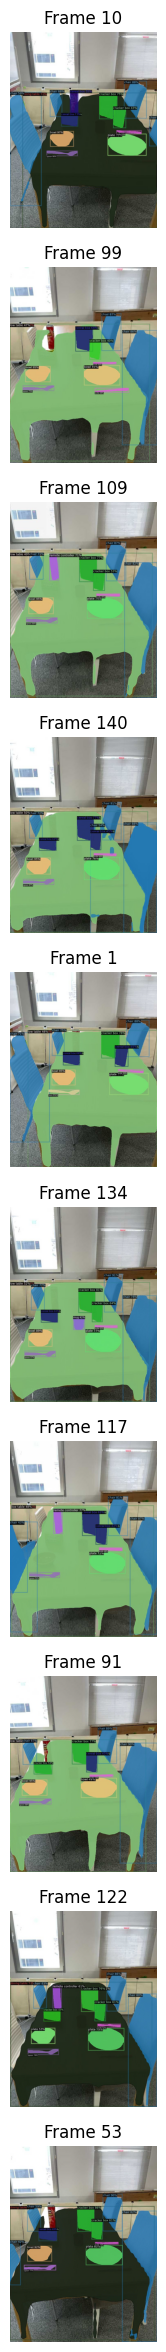

In [10]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

NUM_IMAGES = 10
torch.save(labelled_dataset, "../detic_labeled_dataset_living_add-table.pt")
TOTAL_FRAMES = glob.glob("detic_labelled_results_living_add-table/*.jpg")
fig, axes = plt.subplots(NUM_IMAGES, 1, figsize=(3, 3 * NUM_IMAGES))

for ax, data in zip(axes, range(NUM_IMAGES)):
    random_index = np.random.randint(0, len(TOTAL_FRAMES))
    ax.imshow(Image.open(TOTAL_FRAMES[random_index]))
    ax.axis("off")
    ax.set_title(f"Frame {random_index}")

In [1]:
import logging
import os
import pprint
import random
from typing import Dict, Union

import hydra
import numpy as np
import torch
import torch.nn.functional as F
import torchmetrics
import tqdm
from omegaconf import OmegaConf
from torch.utils.data import DataLoader, Subset

import wandb
import sys
sys.path.append('..')

In [2]:
from dataloaders import (
    R3DSemanticDataset,
    DeticDenseLabelledDataset,
    ClassificationExtractor,
)
from misc import ImplicitDataparallel
from grid_hash_model import GridCLIPModel

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Set up the constants

SAVE_DIRECTORY = "../clip_implicit_model"
DEVICE = "cuda"
IMAGE_TO_LABEL_CLIP_LOSS_SCALE = 1.0
LABEL_TO_IMAGE_LOSS_SCALE = 1.0
EXP_DECAY_COEFF = 0.5
SAVE_EVERY = 5
METRICS = {
    "accuracy": torchmetrics.Accuracy,
}

BATCH_SIZE = 11000
NUM_WORKERS = 10

CLIP_MODEL_NAME = "ViT-B/32"
SBERT_MODEL_NAME = "all-mpnet-base-v2"

In [4]:
# Load the data and create the dataloader created in the previous tutorial notebook

training_data = torch.load("../detic_labeled_dataset_living_add-table.pt")
max_coords, _ = training_data._label_xyz.max(dim=0)
min_coords, _ = training_data._label_xyz.min(dim=0)

In [9]:
torch.load("../clip_implicit_model/implicit_scene_label_model_latest_living.pt")["model"]["temperature"]

tensor(2.7458, device='cuda:0')

In [8]:
torch.load("../clip_implicit_model/implicit_scene_label_model_latest_living.pt")

{'model': OrderedDict([('temperature', tensor(2.7458, device='cuda:0')),
              ('_grid_model.embeddings',
               tensor([[-9.1720e-21, -2.3607e-21, -9.0259e-21,  ...,  5.8388e-24,
                        -9.7124e-21,  2.9069e-21],
                       [ 6.2781e-21,  6.0456e-22,  7.8077e-21,  ...,  1.0481e-20,
                        -6.9152e-21,  8.4994e-21],
                       [ 8.3865e-21, -8.1227e-21, -1.7641e-21,  ..., -1.2210e-20,
                         7.6501e-21, -1.0608e-20],
                       ...,
                       [-2.8201e-03, -3.3077e-03,  2.0981e-03,  ...,  3.5683e-03,
                         9.4790e-04, -5.6426e-03],
                       [-1.8504e-03, -1.6841e-03, -8.7108e-04,  ...,  1.6846e-03,
                         6.9299e-04, -4.2355e-03],
                       [-1.2417e-03, -1.8153e-03, -1.8497e-03,  ..., -5.3882e-04,
                         1.3831e-03, -3.9087e-04]], device='cuda:0')),
              ('_grid_model.offsets',
  

In [7]:
# Set up the model

label_model = GridCLIPModel(
    image_rep_size=training_data[0]["clip_image_vector"].shape[-1],
    text_rep_size=training_data[0]["clip_vector"].shape[-1],
    mlp_depth=1,
    mlp_width=600,
    log2_hashmap_size=20,
    num_levels=18,
    level_dim=8,
    per_level_scale=2,
    max_coords=max_coords,
    min_coords=min_coords,
    # use_trained_model=True,
    # use_model_weight_path="../clip_implicit_model/implicit_scene_label_model_latest_living.pt",
).to(DEVICE)
label_model.load_state_dict(torch.load("../clip_implicit_model/implicit_scene_label_model_latest_living.pt"))

RuntimeError: Error(s) in loading state_dict for GridCLIPModel:
	Missing key(s) in state_dict: "temperature", "_grid_model.embeddings", "_grid_model.offsets", "_post_grid.trunk.0.weight", "_post_grid.trunk.0.bias", "_post_grid.trunk.2.weight", "_post_grid.trunk.2.bias". 
	Unexpected key(s) in state_dict: "model", "optim", "epoch". 

In [5]:
# Set up the model

label_model = GridCLIPModel(
    image_rep_size=training_data[0]["clip_image_vector"].shape[-1],
    text_rep_size=training_data[0]["clip_vector"].shape[-1],
    mlp_depth=1,
    mlp_width=600,
    log2_hashmap_size=20,
    num_levels=18,
    level_dim=8,
    per_level_scale=2,
    max_coords=max_coords,
    min_coords=min_coords,
    use_trained_model=True,
    use_model_weight_path="../clip_implicit_model/implicit_scene_label_model_latest_living.pt",
).to(DEVICE)
# label_model.load_state_dict(torch.load("../clip_implicit_model/implicit_scene_label_model_latest_living.pt"))

In [6]:
@torch.no_grad()
def zero_shot_eval(
    classifier: ClassificationExtractor, 
    predicted_label_latents: torch.Tensor, 
    predicted_image_latents: torch.Tensor, 
    language_label_index: torch.Tensor, 
    metric_calculators: Dict[str, Dict[str, torchmetrics.Metric]]
):
    """Evaluate the model on the zero-shot classification task."""
    class_probs = classifier.calculate_classifications(
        model_text_features=predicted_label_latents,
        model_image_features=predicted_image_latents,
    )
    # Now figure out semantic accuracy and loss.
    # Semseg mask is necessary for the boundary case where all the points in the batch are "unlabeled"
    semseg_mask = torch.logical_and(
        language_label_index != -1,
        language_label_index < classifier.total_label_classes,
    ).squeeze(-1)
    if not torch.any(semseg_mask):
        classification_loss = torch.zeros_like(semseg_mask).mean(dim=-1)
    else:
        # Figure out the right classes.
        masked_class_prob = class_probs[semseg_mask]
        masked_labels = language_label_index[semseg_mask].squeeze(-1).long()
        classification_loss = F.cross_entropy(
            torch.log(masked_class_prob),
            masked_labels,
        )
        if metric_calculators.get("semantic"):
            for _, calculators in metric_calculators["semantic"].items():
                _ = calculators(masked_class_prob, masked_labels)
    return classification_loss

In [7]:
def train(
    clip_train_loader: DataLoader,
    labelling_model: Union[GridCLIPModel, ImplicitDataparallel],
    optim: torch.optim.Optimizer,
    epoch: int,
    classifier: ClassificationExtractor,
    device: Union[str, torch.device] = DEVICE,
    exp_decay_coeff: float = EXP_DECAY_COEFF,
    image_to_label_loss_ratio: float = IMAGE_TO_LABEL_CLIP_LOSS_SCALE,
    label_to_image_loss_ratio: float = LABEL_TO_IMAGE_LOSS_SCALE,
    disable_tqdm: bool = False,
    metric_calculators: Dict[str, Dict[str, torchmetrics.Metric]] = {},
):
    """
    Train the model for one epoch.
    """
    total_loss = 0
    label_loss = 0
    image_loss = 0
    classification_loss = 0
    total_samples = 0
    total_classification_loss = 0
    labelling_model.train()
    total = len(clip_train_loader)
    for clip_data_dict in tqdm.tqdm(
        clip_train_loader,
        total=total,
        disable=disable_tqdm,
        desc=f"Training epoch {epoch}",
    ):
        xyzs = clip_data_dict["xyz"].to(device)
        clip_labels = clip_data_dict["clip_vector"].to(device)
        clip_image_labels = clip_data_dict["clip_image_vector"].to(device)
        image_weights = torch.exp(-exp_decay_coeff * clip_data_dict["distance"]).to(
            device
        )
        label_weights = clip_data_dict["semantic_weight"].to(device)
        image_label_index: torch.Tensor = (
            clip_data_dict["img_idx"].to(device).reshape(-1, 1)
        )
        language_label_index: torch.Tensor = (
            clip_data_dict["label"].to(device).reshape(-1, 1)
        )

        (predicted_label_latents, predicted_image_latents) = labelling_model(xyzs)
        # Calculate the loss from the image to label side.
        batch_size = len(image_label_index)
        image_label_mask: torch.Tensor = (
            image_label_index != image_label_index.t()
        ).float() + torch.eye(batch_size, device=device)
        language_label_mask: torch.Tensor = (
            language_label_index != language_label_index.t()
        ).float() + torch.eye(batch_size, device=device)

        # For logging purposes, keep track of negative samples per point.
        image_label_mask.requires_grad = False
        language_label_mask.requires_grad = False
        contrastive_loss_labels = labelling_model.compute_loss(
            predicted_label_latents,
            clip_labels,
            label_mask=language_label_mask,
            weights=label_weights,
        )
        contrastive_loss_images = labelling_model.compute_loss(
            predicted_image_latents,
            clip_image_labels,
            label_mask=image_label_mask,
            weights=image_weights,
        )
        del (
            image_label_mask,
            image_label_index,
            language_label_mask,
        )

        # Mostly for evaluation purposes, calculate the classification loss.
        classification_loss = zero_shot_eval(
            classifier, predicted_label_latents, predicted_image_latents, language_label_index, metric_calculators
        )

        contrastive_loss = (
            image_to_label_loss_ratio * contrastive_loss_images
            + label_to_image_loss_ratio * contrastive_loss_labels
        )

        optim.zero_grad(set_to_none=True)
        contrastive_loss.backward()
        optim.step()
        # Clip the temperature term for stability
        labelling_model.temperature.data = torch.clamp(
            labelling_model.temperature.data, max=np.log(100.0)
        )
        label_loss += contrastive_loss_labels.detach().cpu().item()
        image_loss += contrastive_loss_images.detach().cpu().item()
        total_classification_loss += classification_loss.detach().cpu().item()
        total_loss += contrastive_loss.detach().cpu().item()
        total_samples += 1

    to_log = {
        "train_avg/contrastive_loss_labels": label_loss / total_samples,
        "train_avg/contrastive_loss_images": image_loss / total_samples,
        "train_avg/semseg_loss": total_classification_loss / total_samples,
        "train_avg/loss_sum": total_loss / total_samples,
        "train_avg/labelling_temp": torch.exp(labelling_model.temperature.data.detach())
        .cpu()
        .item(),
    }
    for metric_dict in metric_calculators.values():
        for metric_name, metric in metric_dict.items():
            try:
                to_log[f"train_avg/{metric_name}"] = (
                    metric.compute().detach().cpu().item()
                )
            except RuntimeError as e:
                to_log[f"train_avg/{metric_name}"] = 0.0
            metric.reset()
    # wandb.log(to_log)
    logging.debug(pprint.pformat(to_log, indent=4, width=1))
    return total_loss

In [8]:
def save(
    labelling_model: Union[ImplicitDataparallel, GridCLIPModel],
    optim: torch.optim.Optimizer,
    epoch: int,
    save_directory: str = SAVE_DIRECTORY,
    saving_dataparallel: bool = False,
):
    if saving_dataparallel:
        to_save = labelling_model.module
    else:
        to_save = labelling_model
    state_dict = {
        "model": to_save.state_dict(),
        "optim": optim.state_dict(),
        "epoch": epoch,
    }
    torch.save(
        state_dict,
        f"{save_directory}/implicit_scene_label_model_latest_living_add-table.pt",
    )
    return 0

In [9]:
train_classifier = ClassificationExtractor(
    clip_model_name=CLIP_MODEL_NAME,
    sentence_model_name=SBERT_MODEL_NAME,
    class_names=training_data._all_classes,
    device=DEVICE,
)

INFO - 2023-06-14 10:31:10,382 - SentenceTransformer - Load pretrained SentenceTransformer: all-mpnet-base-v2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Set up our metrics on this dataset.
train_metric_calculators = {}
train_class_count = {"semantic": train_classifier.total_label_classes}
average_style = ["micro", "macro", "weighted"]
for classes, counts in train_class_count.items():
    train_metric_calculators[classes] = {}
    for metric_name, metric_cls in METRICS.items():
        for avg in average_style:
            if "accuracy" in metric_name:
                new_metric = metric_cls(
                    num_classes=counts, average=avg, multiclass=True
                ).to(DEVICE)
                train_metric_calculators[classes][
                    f"{classes}_{metric_name}_{avg}"
                ] = new_metric


In [11]:
# No dataparallel for now
batch_multiplier = 1

clip_train_loader = DataLoader(
    training_data,
    batch_size=batch_multiplier * BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=NUM_WORKERS,
)
logging.debug(f"Total train dataset sizes: {len(training_data)}")

In [12]:
# Set up optimizer

optim = torch.optim.Adam(
    label_model.parameters(),
    lr=1e-4,
    betas=(0.9, 0.999),
    weight_decay=0.003,
)

In [13]:
os.environ["TOKENIZERS_PARALLELISM"] = "false" # Just to reduce excessive logging from sbert

epoch = 0
NUM_EPOCHS = 5

while epoch <= NUM_EPOCHS:
    train(
        clip_train_loader,
        label_model,
        optim,
        epoch,
        train_classifier,
        metric_calculators=train_metric_calculators,
    )
    epoch += 1
    if epoch % SAVE_EVERY == 0:
        save(label_model, optim, epoch)

Training epoch 5: 100%|█████████████████████████████████████████████████████| 76/76 [00:17<00:00,  4.28it/s]


In [14]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, cycle
from sentence_transformers import SentenceTransformer, util

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split

import tqdm
import einops

import os
import sys
sys.path.append("../") # add parent directory to path

In [15]:
%matplotlib inline
from dataloaders.real_dataset import DeticDenseLabelledDataset
from grid_hash_model import GridCLIPModel

from misc import MLP

In [16]:
!export TOKENIZERS_PARALLELISM=false

In [17]:
import pandas as pd
import pyntcloud
from pyntcloud import PyntCloud
import clip

DEVICE = "cuda"
model, preprocess = clip.load("ViT-B/32", device=DEVICE)
sentence_model = SentenceTransformer("all-mpnet-base-v2")

INFO - 2023-06-14 10:33:08,279 - SentenceTransformer - Load pretrained SentenceTransformer: all-mpnet-base-v2
INFO - 2023-06-14 10:33:09,711 - SentenceTransformer - Use pytorch device: cuda


In [18]:
training_data = torch.load("../detic_labeled_dataset_living_add-table.pt")
max_coords, _ = training_data._label_xyz.max(dim=0)
min_coords, _ = training_data._label_xyz.min(dim=0)
print(max_coords)

tensor([ 1.9340, -0.3017, -0.4828])


In [19]:
training_data._label_xyz

tensor([[ 0.0374, -0.5580, -1.1210],
        [ 0.0209, -0.5494, -1.0920],
        [ 0.0447, -0.5457, -1.0816],
        ...,
        [ 0.6257, -0.8596, -0.5296],
        [ 0.6102, -0.8667, -0.5271],
        [ 0.6094, -0.8708, -0.5274]])

In [20]:
label_model = GridCLIPModel(
    image_rep_size=training_data[0]["clip_image_vector"].shape[-1],
    text_rep_size=training_data[0]["clip_vector"].shape[-1],
    mlp_depth=1,
    mlp_width=600,
    log2_hashmap_size=20,
    num_levels=18,
    level_dim=8,
    per_level_scale=2,
    max_coords=max_coords,
    min_coords=min_coords,
).to(DEVICE)

model_weights_path = "../clip_implicit_model/implicit_scene_label_model_latest_living_add-table.pt"
model_weights = torch.load(model_weights_path, map_location=DEVICE)
label_model.load_state_dict(model_weights["model"])
print(label_model)
print("Loaded model from", model_weights_path)

GridCLIPModel(
  (_grid_model): GridEncoder: input_dim=3 num_levels=18 level_dim=8 resolution=16 -> 2097152 per_level_scale=2.0000 params=(16044136, 8) gridtype=hash align_corners=False
  (_post_grid): MLP(
    (trunk): Sequential(
      (0): Linear(in_features=144, out_features=600, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=600, out_features=1280, bias=True)
    )
  )
  (_image_head): Identity()
)
Loaded model from ../clip_implicit_model/implicit_scene_label_model_latest_living_add-table.pt


In [21]:
batch_size = 30_000
points_dataloader = DataLoader(
    training_data._label_xyz, batch_size=batch_size, num_workers=10,
)
print("Created data loader", points_dataloader)

Created data loader <torch.utils.data.dataloader.DataLoader object at 0x7f5ed33aa250>


In [22]:
def calculate_clip_and_st_embeddings_for_queries(queries):
    all_clip_queries = clip.tokenize(queries)
    with torch.no_grad():
        all_clip_tokens = model.encode_text(all_clip_queries.to(DEVICE)).float()
        all_clip_tokens = F.normalize(all_clip_tokens, p=2, dim=-1)
        all_st_tokens = torch.from_numpy(sentence_model.encode(queries))
        all_st_tokens = F.normalize(all_st_tokens, p=2, dim=-1).to(DEVICE)
    return all_clip_tokens, all_st_tokens

query = "I'm hungry."
clip_text_tokens, st_text_tokens = calculate_clip_and_st_embeddings_for_queries([query])
print("query =", query)
print("tokens shape =", clip_text_tokens.shape)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

query = I'm hungry.
tokens shape = torch.Size([1, 512])


In [23]:
def find_alignment_over_model(label_model, queries, dataloader, visual=False):
    clip_text_tokens, st_text_tokens = calculate_clip_and_st_embeddings_for_queries(queries)
    # We give different weights to visual and semantic alignment 
    # for different types of queries.
    if visual:
        vision_weight = 10.0
        text_weight = 1.0
    else:
        vision_weight = 1.0
        text_weight = 10.0
    point_opacity = []
    with torch.no_grad():
        for data in tqdm.tqdm(dataloader, total=len(dataloader)):
            # Find alignmnents with the vectors
            predicted_label_latents, predicted_image_latents = label_model(data.to(DEVICE))
            data_text_tokens = F.normalize(predicted_label_latents, p=2, dim=-1).to(DEVICE)
            data_visual_tokens = F.normalize(predicted_image_latents, p=2, dim=-1).to(DEVICE)
            text_alignment = data_text_tokens @ st_text_tokens.T
            visual_alignment = data_visual_tokens @ clip_text_tokens.T
            total_alignment = (text_weight * text_alignment) + (vision_weight * visual_alignment)
            total_alignment /= (text_weight + vision_weight)
            point_opacity.append(total_alignment)

    point_opacity = torch.cat(point_opacity).T
    print(point_opacity.shape)
    return point_opacity


In [24]:
merged_pcd = o3d.geometry.PointCloud()
merged_pcd.points = o3d.utility.Vector3dVector(training_data._label_xyz)
merged_pcd.colors = o3d.utility.Vector3dVector(training_data._label_rgb)
merged_downpcd = merged_pcd.voxel_down_sample(voxel_size=0.03)

print("Create pts result")
pts_result = np.concatenate((np.asarray(merged_downpcd.points), np.asarray(merged_downpcd.colors)), axis=-1)

df = pd.DataFrame(
    # same arguments that you are passing to visualize_pcl
    data=pts_result,
    columns=["x", "y", "z", "red", "green", "blue"]
)
cloud = PyntCloud(df)

print("Point cloud", cloud)

Create pts result
Point cloud PyntCloud
7612 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.4191310966355476, -0.68592789760664, -1.3095340080613918
Other attributes:



             x         y         z         red       green        blue
0     0.617472 -1.206184 -0.952503   49.000000   47.000000   35.000000
1     0.692678 -1.268906 -0.985784   48.000000   44.000000   33.000000
2     0.823806 -0.558887 -2.227598  173.000000  145.666667  110.333333
3     0.803457 -0.558651 -2.247019  159.000000  136.000000  104.000000
4     0.775411 -0.558203 -2.144045  171.500000  143.500000  106.500000
...        ...       ...       ...         ...         ...         ...
7607  0.459301 -0.574475 -1.502560  162.016393   85.508197   69.221311
7608  0.105967 -0.570690 -0.813460  103.646434   90.585736   86.841426
7609  0.845467 -0.478984 -0.750582  104.854545   98.454545   86.654545
7610  1.185999 -1.285983 -1.082405   81.666667   78.666667   68.333333
7611  1.184831 -1.270055 -1.082950   85.333333   83.666667   73.000000

[7612 rows x 6 columns]


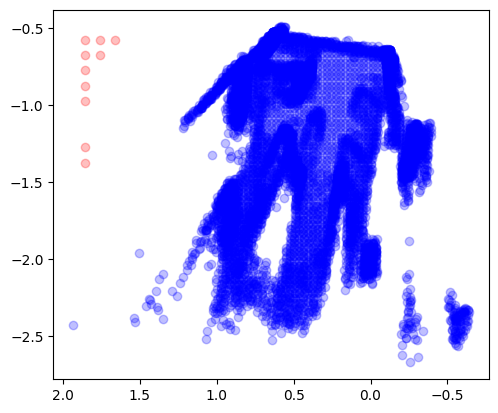

Found some valid points: (10, 2)


In [25]:
# Now figure out the points that are far enough.
coordinates = cloud.points
coordinates = coordinates[coordinates.y < 0]

# This is the cutoff used for NYU kitchen
CUTOFF = 0.65

# Make a top down map for visualization. This step works best if the data is axis aligned.
def get_and_show_valid_points(coordinates, cutoff=CUTOFF, library=True):
    blockers = np.array([coordinates.x, coordinates.z]).T
    print(coordinates)
    all_grid_points = np.array(np.meshgrid(np.arange(coordinates.x.min(), coordinates.x.max(), 0.1), np.arange(coordinates.z.min(), coordinates.z.max(), 0.1))).reshape(2, -1).T
    distance = np.linalg.norm(blockers[None, :, :] - all_grid_points[:, None, :], axis=2, ord=2)

    valid_points_index = distance.min(axis=1) > cutoff
    valid_points = all_grid_points[valid_points_index]

    ax = plt.subplot(111)
    ax.scatter(coordinates.x, coordinates.z, c="blue", alpha=0.25)
    ax.scatter(valid_points[:, 0], valid_points[:, 1], c="red", alpha = 0.25)
    ax.invert_xaxis()
    ax.set_aspect('equal', 'box')
    plt.show()
    return valid_points

valid_points = get_and_show_valid_points(coordinates)
print("Found some valid points:", valid_points.shape)

In [26]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

queries = [
    # Literal
    "Stack of tableware",
    "tv",
    "the sofa",  # intentional misspelling
    "set of fruits",
    "drinks",

    # Visual
    # "white ceramic bowl",
    # "red plastic bowl",
    # "red coffee machine",
    # "espresso machine",
    # "blue garbage bin",
    # "potted plant in a black pot",
    # "purple poster",
    # "toaster oven",

    # Semantic
    "I'm hungry.",
    "I'm thirsty.",
    "I'm tired.",
    "I'm hot.",
    "I want someting sweet",
    # "put away my leftovers",
    "fill out water bottle",
    # "",
    # "warm up my lunch",
]
# TODO: change to visual = True for visual queries.
visual = False
alignment_q = find_alignment_over_model(label_model, queries, points_dataloader, visual=visual)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  8.92it/s]

torch.Size([11, 831887])


torch.Size([831887])


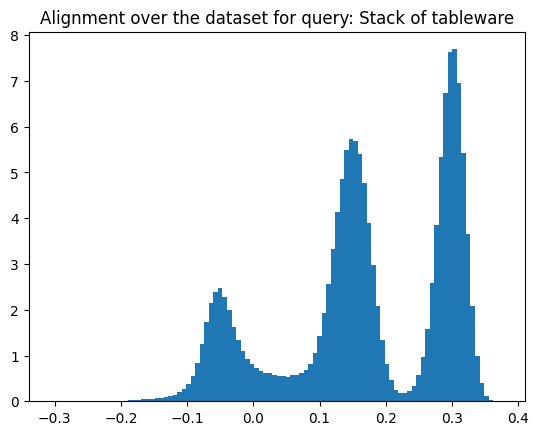

In [27]:
fig = plt.figure()
q = alignment_q[0].squeeze()
print(q.shape)
alpha = q.detach().cpu().numpy()
plt.hist(alpha, 100, density=True)
plt.title(f"Alignment over the dataset for query: {queries[0]}")

plt.show()

In [28]:
%matplotlib inline
from dataloaders.real_dataset import DeticDenseLabelledDataset
from grid_hash_model import GridCLIPModel

from misc import MLP

In [29]:
%matplotlib inline
from dataloaders.real_dataset import DeticDenseLabelledDataset
from grid_hash_model import GridCLIPModel

from misc import MLP

In [30]:
os.makedirs("visualized_pointcloud", exist_ok=True)

max_points = []
max_points_goto = []
mean_points = []
mean_point_goto = []
use_threshold = True
for query, q in zip(queries, alignment_q):
    alpha = q.detach().cpu().numpy()
    pts = training_data._label_xyz.detach().cpu()

    # We are thresholding the points to get the top 0.01% of points.
    # Subsample if the number of points is too large.
    threshold = torch.quantile(q[::10, ...], 0.9999).cpu().item()

    # Normalize alpha
    a_norm = (alpha - alpha.min()) / (alpha.max() - alpha.min())
    a_norm = torch.as_tensor(a_norm[..., np.newaxis])
    all_colors = torch.cat((a_norm, torch.zeros_like(a_norm), 1-a_norm), dim=1)

    if use_threshold:
        thres = alpha > threshold
        points = training_data._label_xyz[thres]
        max_point = pts[torch.argmax(a_norm)]
        max_points.append(max_point)
        print(f"LOOKAT {query} {max_point.tolist()}")
        colors = all_colors[thres]
    else:
        points = training_data._label_xyz
        colors = all_colors
    merged_pcd = o3d.geometry.PointCloud()
    merged_pcd.points = o3d.utility.Vector3dVector(points)
    merged_pcd.colors = o3d.utility.Vector3dVector(colors)
    merged_downpcd = merged_pcd.voxel_down_sample(voxel_size=0.01)
    visual_str = "_visual" if visual else ""
    thres_str = "_thres" if use_threshold else ""
    o3d.io.write_point_cloud(f"visualized_pointcloud/model_nyu_kitchen_{query}{visual_str}{thres_str}.ply", merged_downpcd)

LOOKAT Stack of tableware [0.0211645495146513, -0.569466769695282, -1.161668062210083]
LOOKAT tv [0.5180677175521851, -0.5369614958763123, -1.2917746305465698]
LOOKAT the sofa [0.8380235433578491, -0.5783701539039612, -1.6178971529006958]
LOOKAT set of fruits [0.4589872658252716, -0.5689873695373535, -1.4461842775344849]
LOOKAT drinks [0.5965685248374939, -0.5700139403343201, -0.9535435438156128]
LOOKAT I'm hungry. [0.5267653465270996, -0.5635185837745667, -0.9247258305549622]
LOOKAT I'm thirsty. [0.3723409175872803, -0.5663900375366211, -0.801767110824585]
LOOKAT I'm tired. [0.019781766459345818, -0.5792386531829834, -1.9594941139221191]
LOOKAT I'm hot. [0.5267404317855835, -0.5705177783966064, -1.0149877071380615]
LOOKAT I want someting sweet [0.4946516454219818, -0.5334692001342773, -1.3886182308197021]
LOOKAT fill out water bottle [0.5115424990653992, -0.5084383487701416, -1.357061743736267]


In [31]:
from pyntcloud.plot.common import get_colors

from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.cm as cm


def set_proper_aspect_ratio(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

def plot_with_matplotlib(cloud, 
            **kwargs):

    colors = get_colors(cloud, kwargs["use_as_color"], kwargs["cmap"])

    ptp = cloud.xyz.ptp()

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.view_init(elev=kwargs.get("elev", 0.0), azim=kwargs.get("azim", 90.0))

    ax.scatter(
        cloud.xyz[:, 0],
        cloud.xyz[:, 1],
        cloud.xyz[:, 2],
        marker="D",
        facecolors=colors / 255,
        alpha=0.25,
        zdir="z",
        depthshade=True,
        s=kwargs["initial_point_size"] or ptp / 10
    )


    if "text" in kwargs:
        for i, (points, text) in enumerate(kwargs["text"]):
            ax.text(points[0], points[1], points[2], text)

    if "title" in kwargs:
        ax.set_title(kwargs["title"])
    
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    set_proper_aspect_ratio(ax)

    return plt.show()

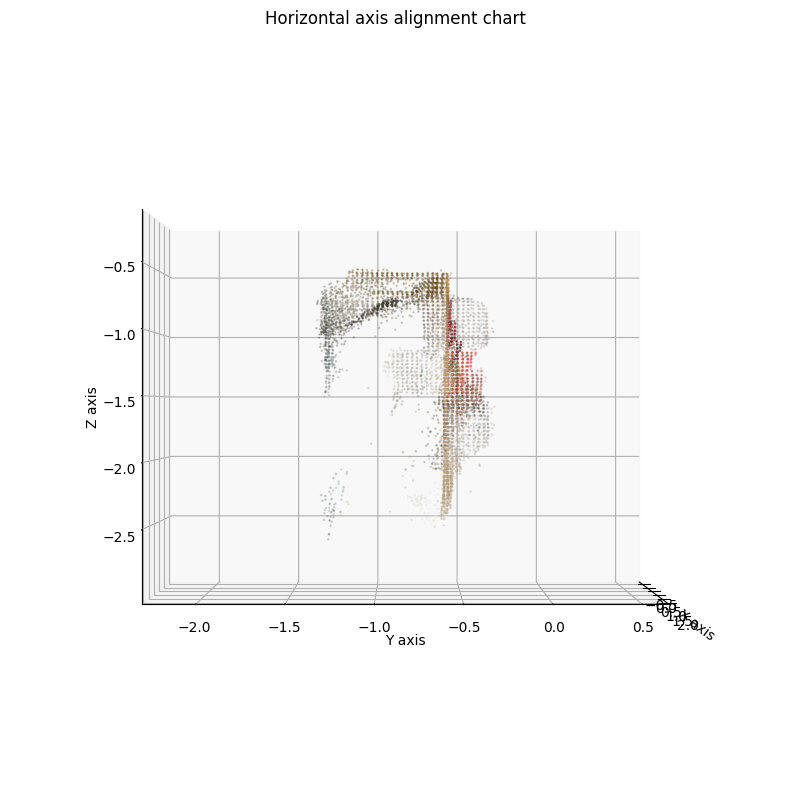

In [32]:
plot_with_matplotlib(
    cloud,
    width=800,
    height=500,
    background="black",
    mesh=False,
    use_as_color=["red", "green", "blue"],
    initial_point_size=None,
    cmap="hsv",
    polylines=None,
    linewidth=5,
    return_scene=False,
    output_name="pyntcloud_plot",
    elev=0.,
    azim=0.,
    title="Horizontal axis alignment chart",
)

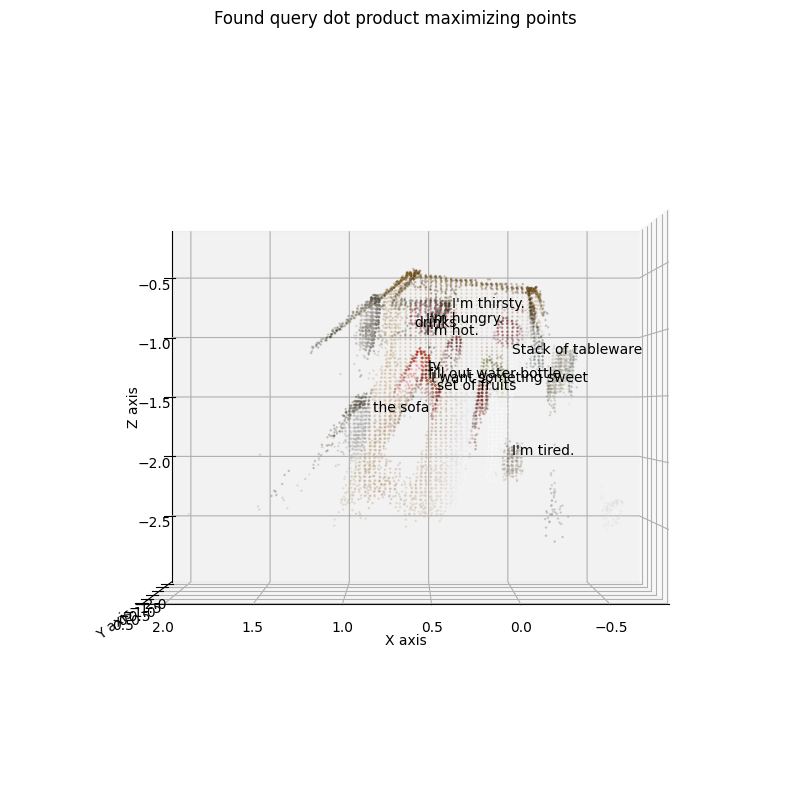

In [33]:
plot_with_matplotlib(
    cloud,
    width=800,
    height=500,
    background="black",
    mesh=False,
    use_as_color=["red", "green", "blue"],
    initial_point_size=None,
    cmap="hsv",
    polylines=None,
    linewidth=5,
    return_scene=False,
    output_name="pyntcloud_plot",
    elev=0.,
    azim=90.,
    text=zip(max_points, queries),
    title="Found query dot product maximizing points",
    goto=max_points_goto,
)